In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
suicide_data = pd.read_csv("master.csv")
suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


***RENAMING COLUMNS (temporary)***

In [3]:
# first start with renaming the columns:
# suicides/100k pop -> suicides_per_100k
# HDI for year -> hdi_for_year
# gdp_for_year $ -> gdp_for_year
# gdp_per_capita $ -> gdp_per_capita

cols_rename = {"suicides/100k pop": "suicides_per_100k", "HDI for year": "hdi_for_year",
               " gdp_for_year ($) ": "gdp_for_year", "gdp_per_capita ($)": "gdp_per_capita"}

suicide_data.rename(axis=1, mapper = cols_rename, inplace = True)

***process the data so it's easier to use for analysis***

In [4]:
# country-year just decomposes to year and country so ignore this
# drop country-year
suicide_data.drop(columns = ["country-year"], axis = 1, inplace = True)

# drop generation as that is an indicator of age
suicide_data.drop(columns = ["generation"], axis = 1, inplace = True)

***change the columns to be easier to access***

In [5]:
# let's encode the age bands with integers since these are ordinal
suicide_data.loc[:, "age"].unique()

# enocde age bands
age_encoding = {"5-14 years": 1, "15-24 years": 2, "25-34 years": 3, "35-54 years": 4, "55-74 years": 5, "75+ years": 6}
suicide_data.loc[:, "age"] = suicide_data.loc[:, "age"].map(lambda x: age_encoding[x])

In [6]:
# change gdp_for_year ($) to be numeric
suicide_data.loc[:, "gdp_for_year"] = suicide_data.loc[:, "gdp_for_year"].map(lambda x: float(x.replace(",", "")))

***check the overview after processing***

In [7]:
suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides_per_100k,hdi_for_year,gdp_for_year,gdp_per_capita
0,Albania,1987,male,2,21,312900,6.71,NaN,2.156625e+09,796
1,Albania,1987,male,4,16,308000,5.19,NaN,2.156625e+09,796
2,Albania,1987,female,2,14,289700,4.83,NaN,2.156625e+09,796
3,Albania,1987,male,6,1,21800,4.59,NaN,2.156625e+09,796
4,Albania,1987,male,3,9,274300,3.28,NaN,2.156625e+09,796


In [8]:
suicide_data.describe()

,year,age,suicides_no,population,suicides_per_100k,hdi_for_year,gdp_for_year,gdp_per_capita
count,27820.000000,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000
mean,2001.258375,3.502876,242.574407,1.844794e+06,12.816097,0.776601,4.455810e+11,16866.464414
std,8.469055,1.706730,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472
min,1985.000000,1.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,1995.000000,2.000000,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000
50%,2002.000000,4.000000,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000
75%,2008.000000,5.000000,131.000000,1.486143e+06,16.620000,0.855000,2.602024e+11,24874.000000
max,2016.000000,6.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000


### Looking similar names of columns to confirm their values are genuine correlated  

<AxesSubplot:xlabel='suicides_no', ylabel='suicides_per_100k'>

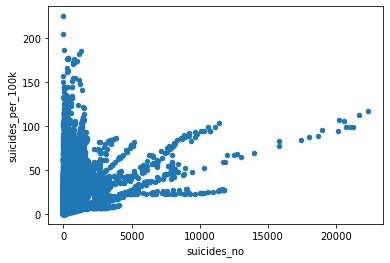

In [9]:
# suicides_no is probably correlated to suicides_per_100k 
suicide_data.plot.scatter(y = "suicides_per_100k", x = "suicides_no")

In [10]:
# have a look at the top 10 countries for suicide number
suicide_data.groupby(by = ["country"]) \
    .apply(func = lambda x: x.suicides_no.sum()) \
    .sort_values(ascending = False).head(10)

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
dtype: int64

In [11]:
# have a look at the top 10 countries for suicide rate
top_10 = suicide_data.groupby(by = ["country"]) \
    .apply(func = lambda x: x.suicides_per_100k.sum()) \
    .sort_values(ascending = False).head(10).index
top_10

Index(['Russian Federation', 'Lithuania', 'Hungary', 'Kazakhstan',
       'Republic of Korea', 'Austria', 'Ukraine', 'Japan', 'Finland',
       'Belgium'],
      dtype='object', name='country')

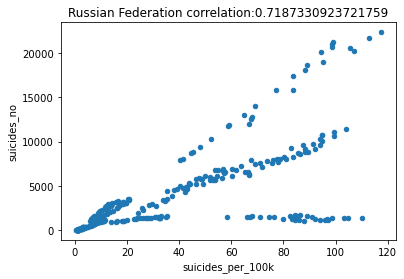

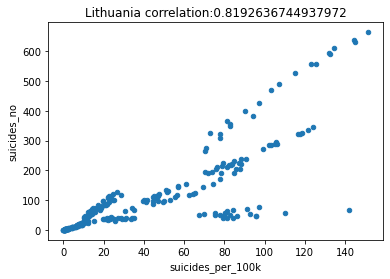

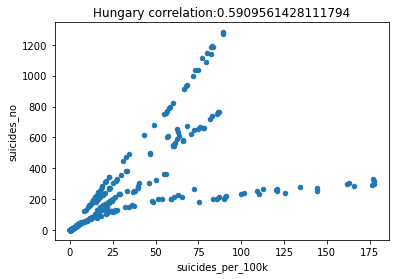

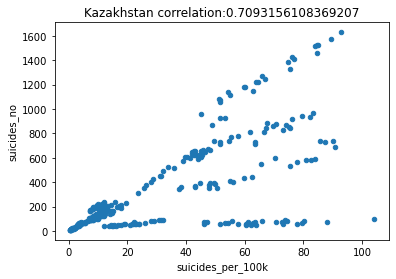

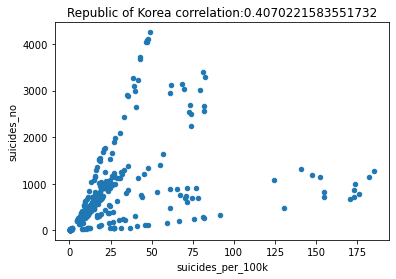

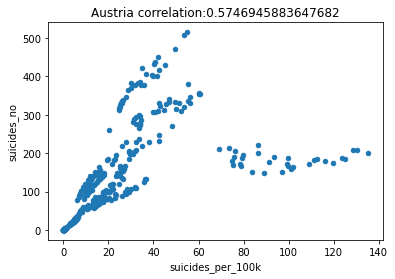

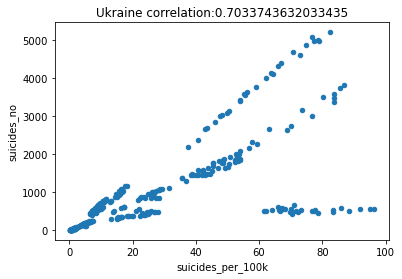

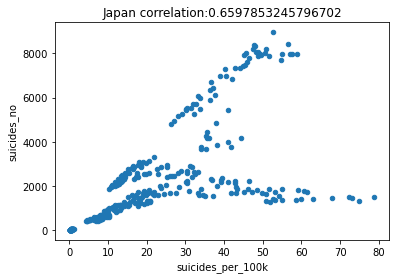

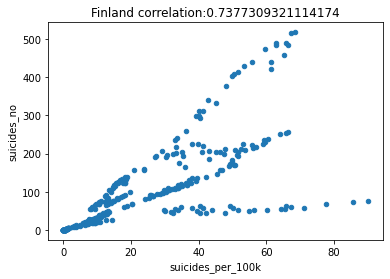

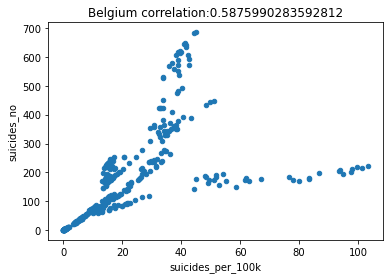

In [12]:
# lets have a look at the relationship between suicide no and suicides rate for the top 10 countries
for country in top_10:
    _ = suicide_data.loc[
        suicide_data.country == country
        ,["suicides_no", "suicides_per_100k"]
    ].corr().iloc[0,1]
    
    suicide_data[suicide_data.country == country] \
        .plot.scatter(x = "suicides_per_100k", y = "suicides_no", title = country + " correlation:" + str(_))

suicide_data.drop(columns = ["suicides_no"], axis = 1, inplace = True)

***mostly positive correlations -> drop suicides_no column*** <br>
***focus on predicting suicide rate rather than the suicide no as it is more insensitive to the population size***

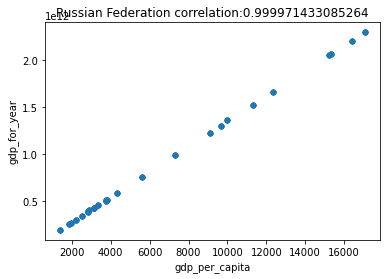

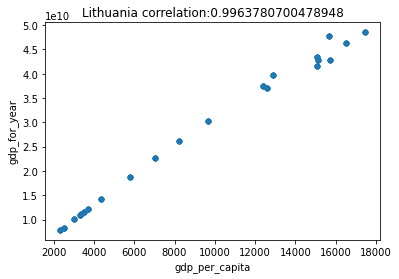

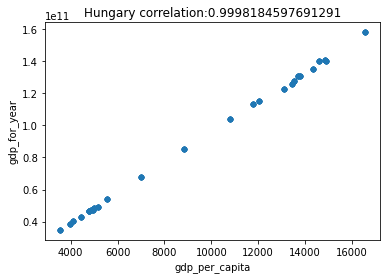

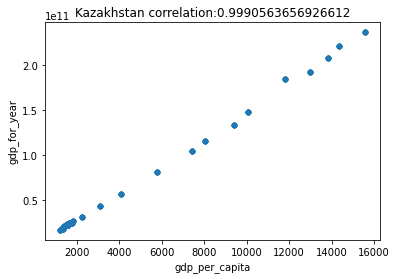

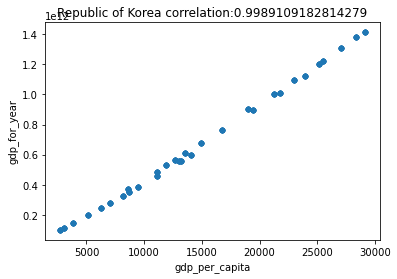

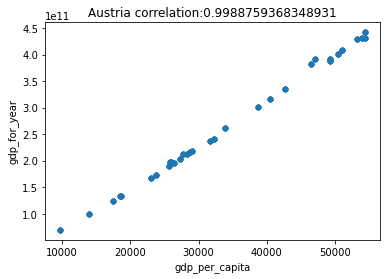

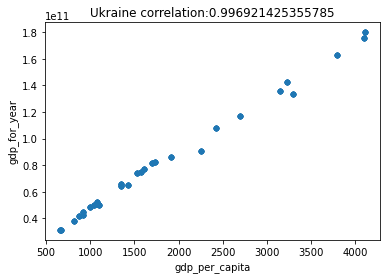

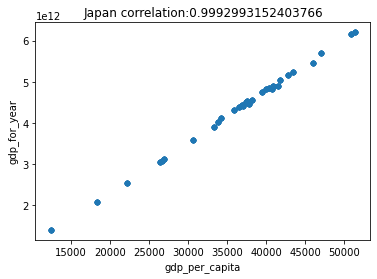

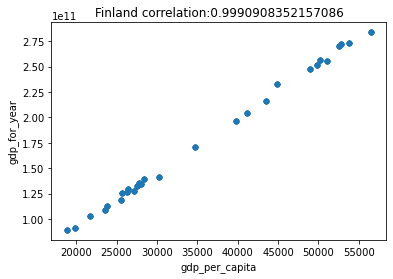

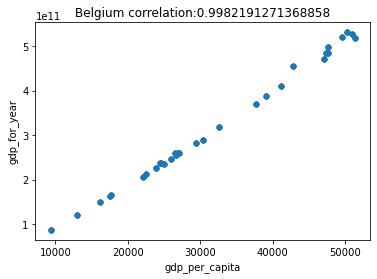

In [13]:
# repeat the same between gdp per capita and gdp for year

for country in top_10:
    _ = suicide_data.loc[
            suicide_data.country == country
            ,["gdp_per_capita", "gdp_for_year"]
        ].corr().iloc[0,1]
    
    suicide_data[suicide_data.country == country] \
        .plot.scatter(x = "gdp_per_capita", y = "gdp_for_year", title = country + " correlation:" + str(_))
    
suicide_data.drop(columns = ["gdp_for_year"], axis = 1, inplace = True)

***very strong correlation -> drop gdp_for_year***

In [14]:
# are there columns with high missingness?
suicide_data.apply(axis=0, func = lambda x: pd.isna(x).sum())

country                  0
year                     0
sex                      0
age                      0
population               0
suicides_per_100k        0
hdi_for_year         19456
gdp_per_capita           0
dtype: int64

In [15]:
# missingness of HDI is across all years, ages and countries
# so not biased towards a particular demographic
suicide_data[~pd.isna(suicide_data.hdi_for_year)].describe()

,year,age,population,suicides_per_100k,hdi_for_year,gdp_per_capita
count,8364.000000,8364.000000,8.364000e+03,8364.000000,8364.000000,8364.000000
mean,2005.348637,3.500000,1.852173e+06,11.991936,0.776601,21074.371593
std,8.803020,1.707927,3.969754e+06,17.361772,0.093367,22579.186968
min,1985.000000,1.000000,8.750000e+02,0.000000,0.483000,313.000000
25%,2000.000000,2.000000,1.216425e+05,1.040000,0.713000,4862.000000
50%,2010.000000,3.500000,4.722505e+05,5.720000,0.779000,12584.000000
75%,2012.000000,5.000000,1.500290e+06,15.442500,0.855000,30271.000000
max,2014.000000,6.000000,4.350934e+07,187.060000,0.944000,126352.000000


***Hence, best to drop HDI***

In [16]:
suicide_data.drop(columns = ["hdi_for_year"], axis = 1, inplace=True)

## Let's have a look at some univariate relationships between each predictor and suicide rate across the years

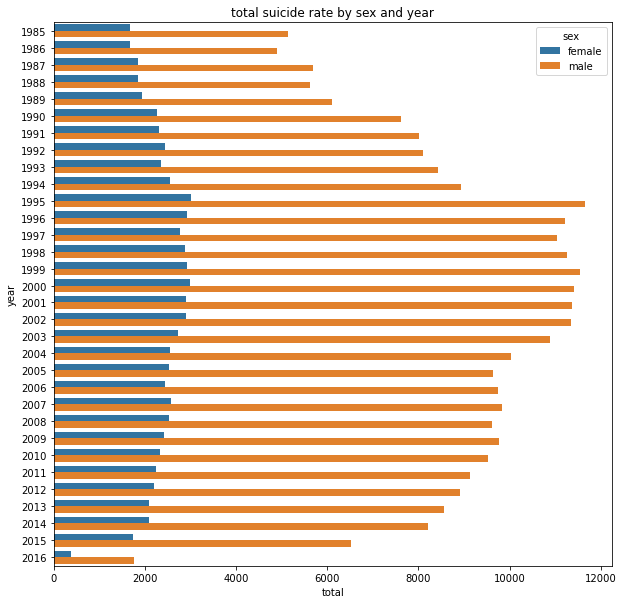

In [17]:
# sex
sex_data = suicide_data.groupby(by = ["sex", "year"]) \
    .apply(func = lambda x: pd.Series({"total": x.suicides_per_100k.sum()}))
sex_data = sex_data.reset_index()

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(ax = ax, y="year", x="total", hue = "sex", data=sex_data, orient="h")\
    .set_title("total suicide rate by sex and year")

***looks like males have a higher rate overall across the years upward trend following a decreasing trend***

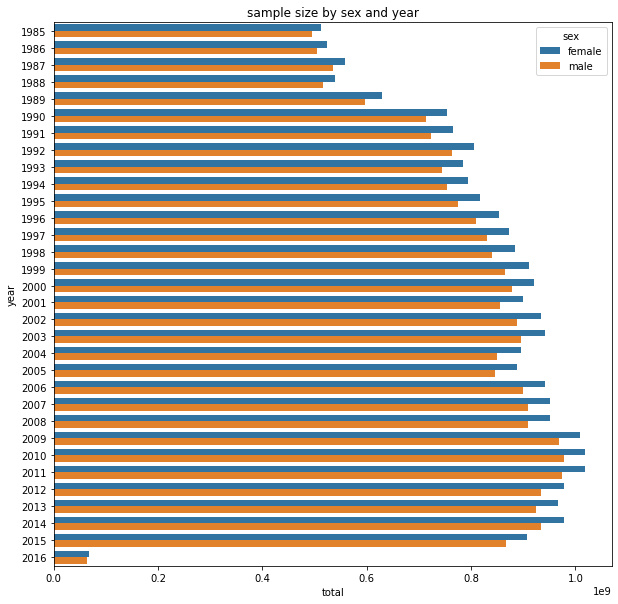

In [18]:
# how many males/ females yer pear
sex_data = suicide_data.groupby(by = ["sex", "year"]) \
    .apply(func = lambda x: pd.Series({"total": x.population.sum()}))

sex_data = sex_data.reset_index()

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(ax =ax, y="year", x="total", hue = "sex", data=sex_data, orient="h")\
    .set_title("sample size by sex and year")

***about the similar levels each year, which suggest suicide rates are dominated by males in general***

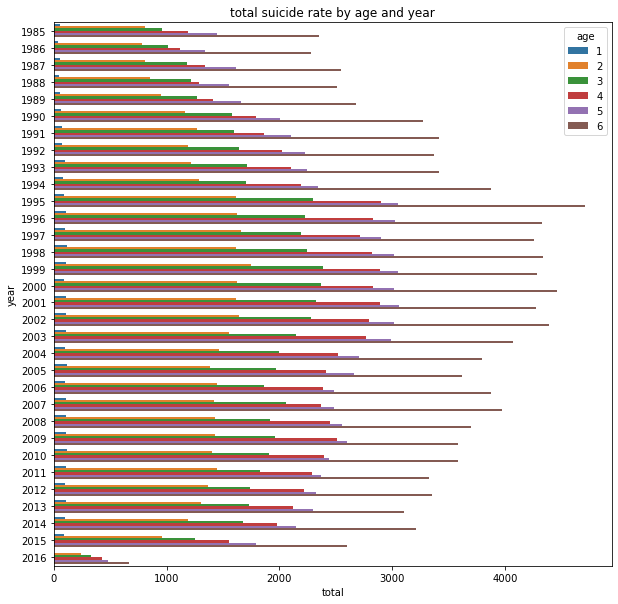

In [19]:
# now lets look at age
age_data = suicide_data.groupby(by = ["age", "year"]) \
    .apply(func = lambda x: pd.Series({"total": x.suicides_per_100k.sum()}))

age_data = age_data.reset_index()

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(y="year", x="total", hue = "age", data=age_data, orient="h")\
    .set_title("total suicide rate by age and year")

***looks like age has an impact on suicide rate across years with older individuals more likely to commit suicide***

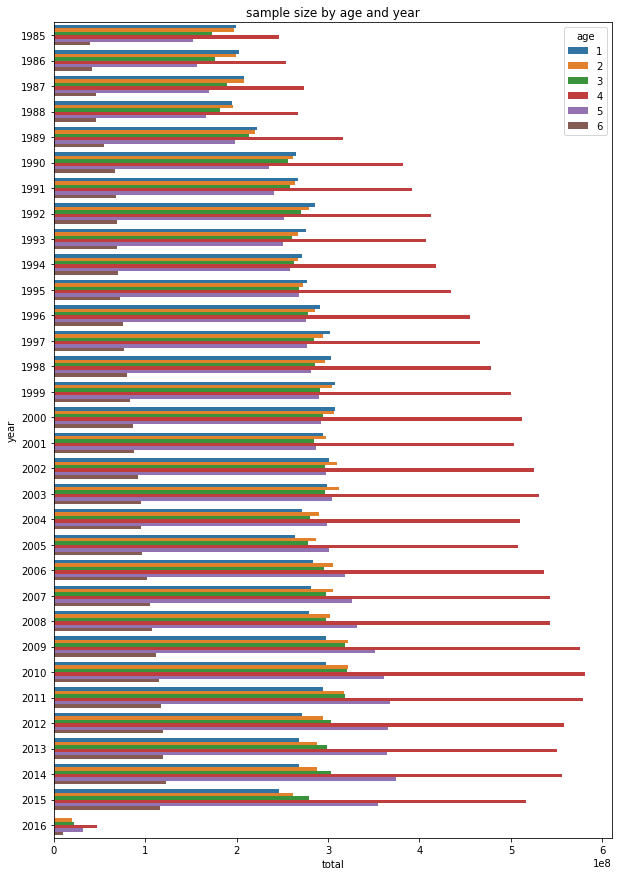

In [20]:
# again check the sample size to see if there is an unequal balance across age bands
age_data = suicide_data.groupby(by = ["age", "year"]) \
    .apply(func = lambda x: pd.Series({"total": x.population.sum()}))

age_data = age_data.reset_index()

fig, ax = plt.subplots(figsize=(10, 15))
ax = sns.barplot(y="year", x="total", hue = "age", data=age_data, orient="h") \
    .set_title("sample size by age and year")

***again, seems that the ages are uniform across bands***

<ipython-input-21-b32ce1850b38>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (10, 5))


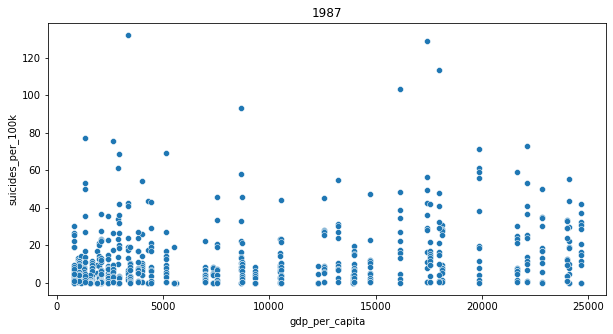

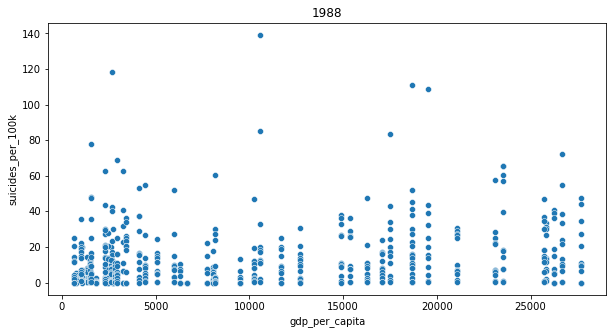

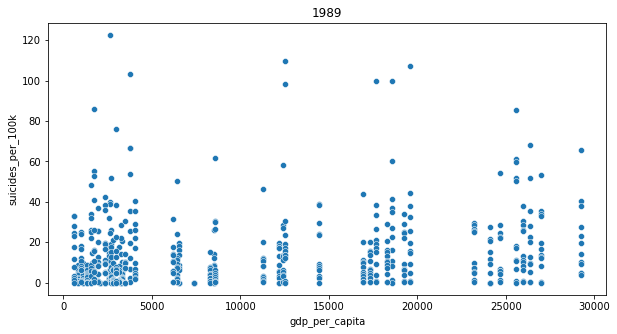

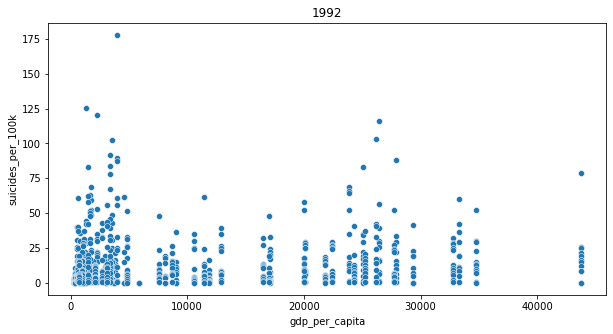

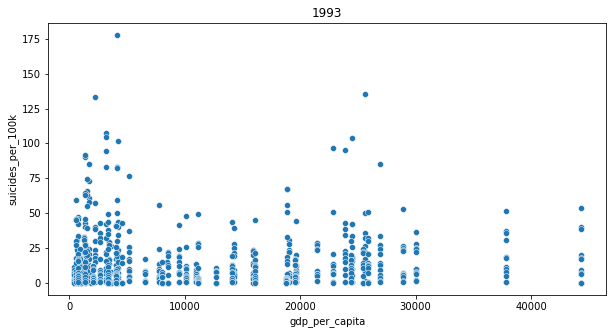

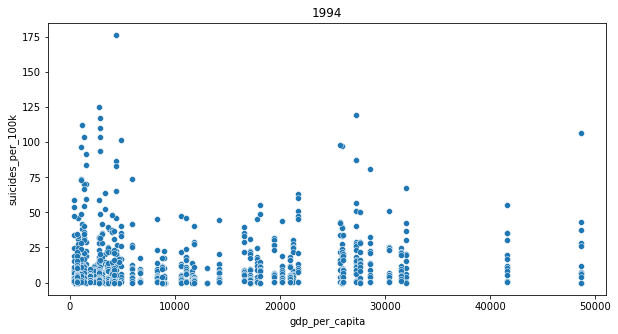

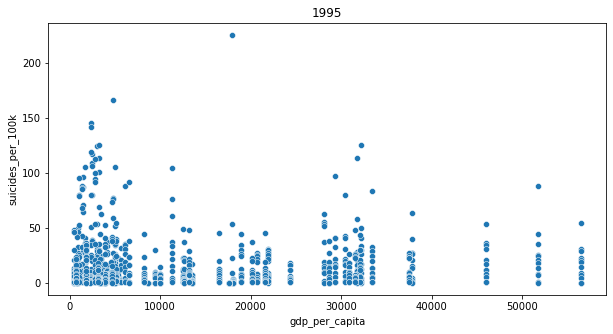

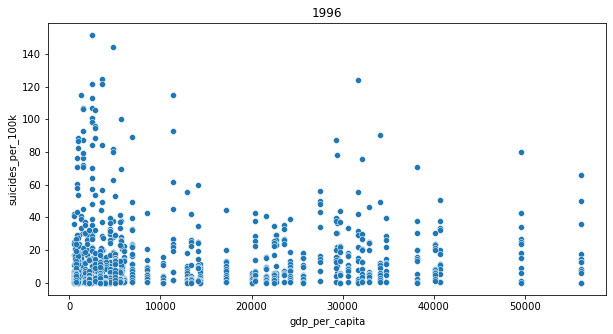

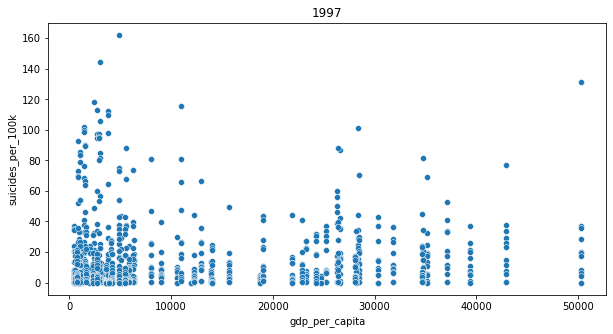

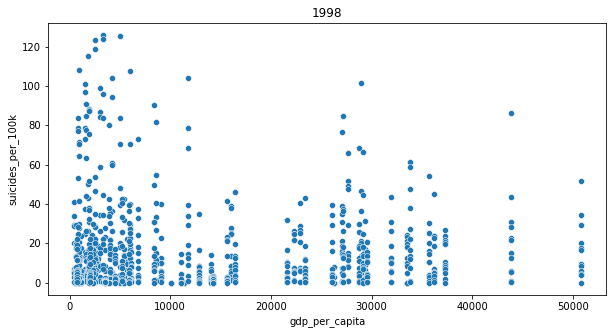

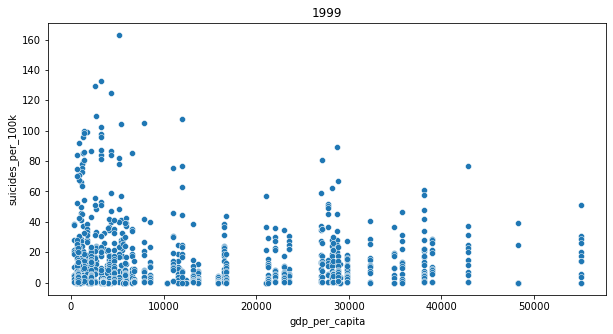

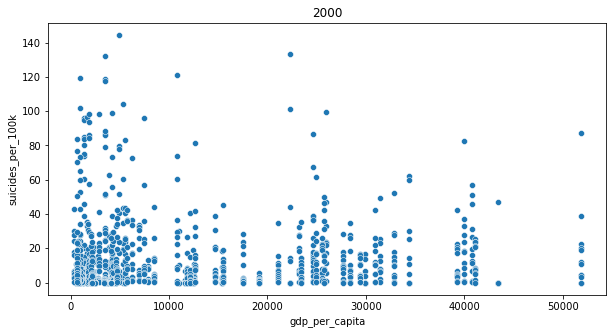

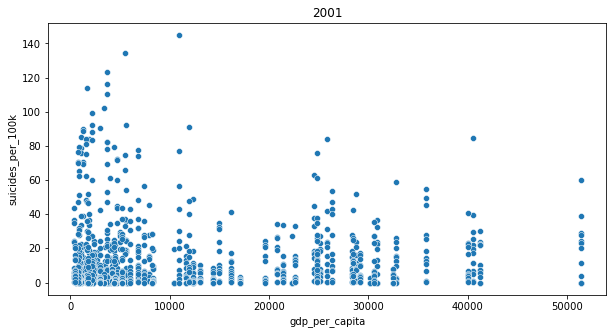

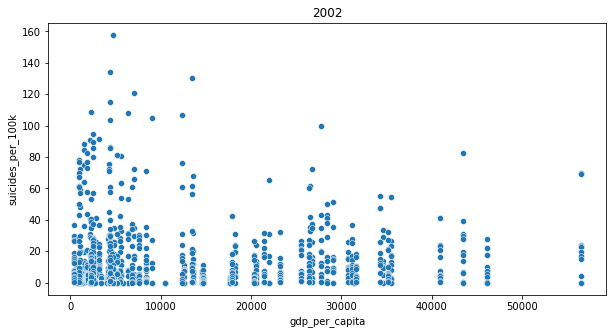

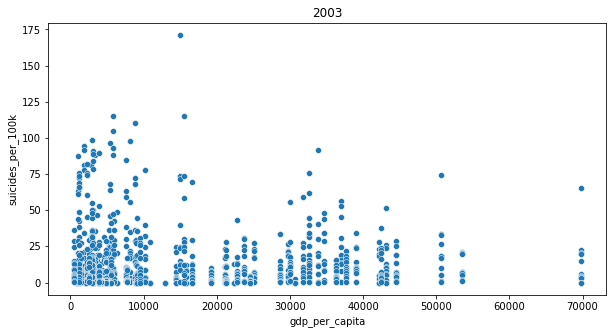

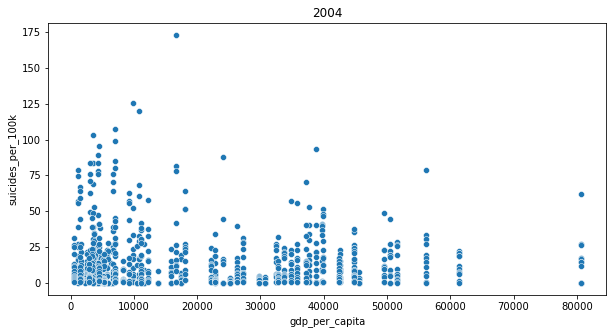

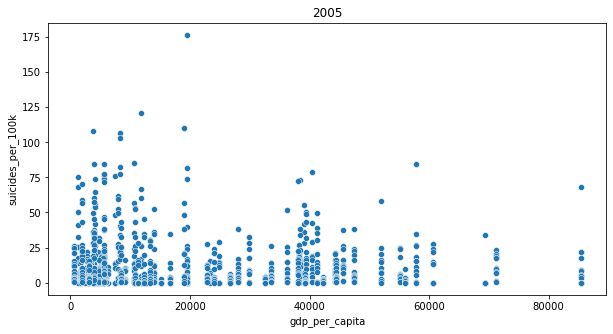

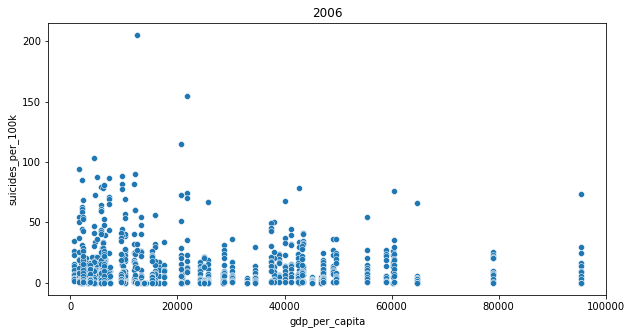

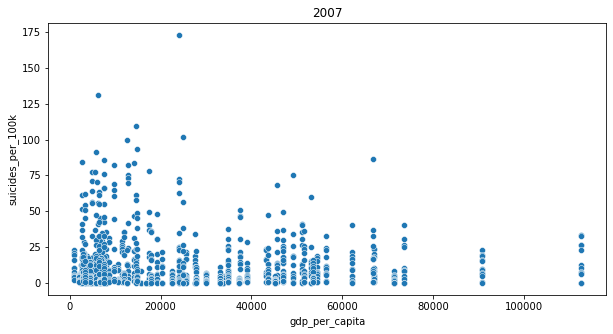

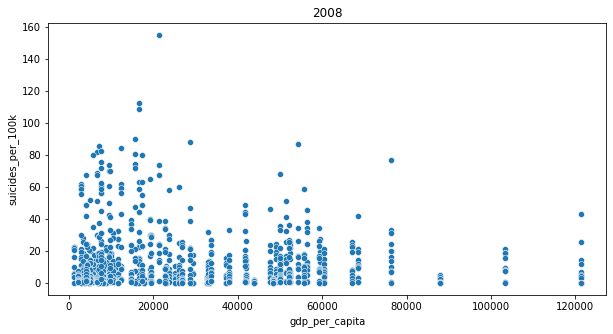

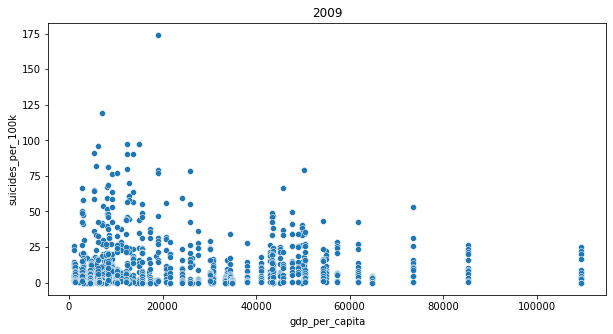

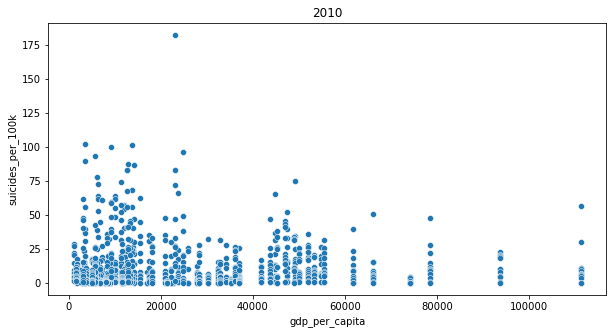

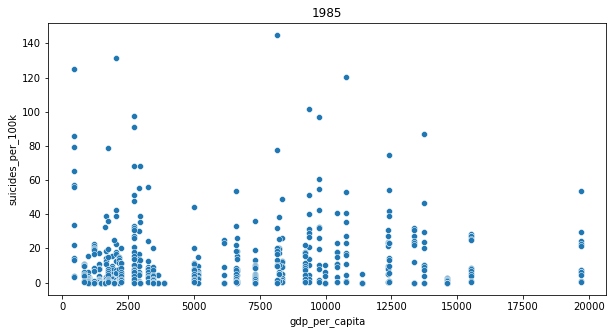

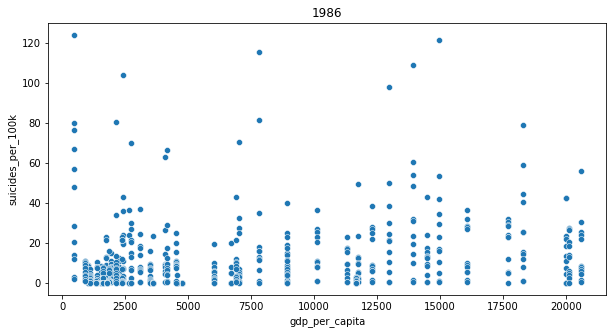

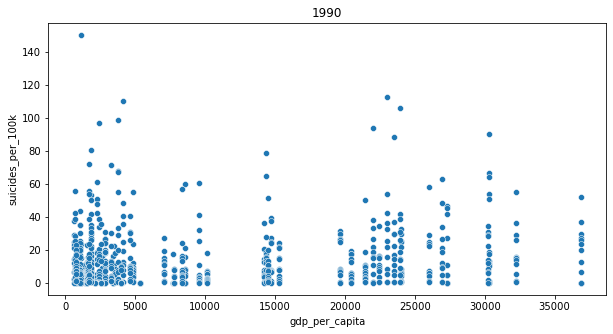

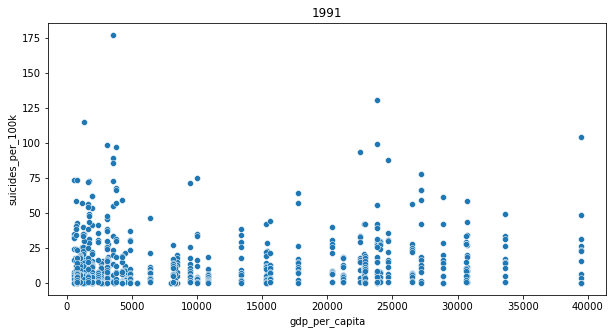

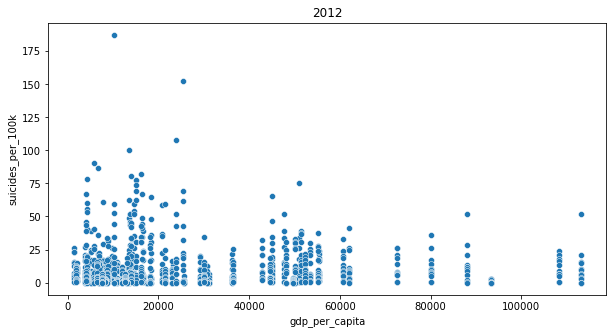

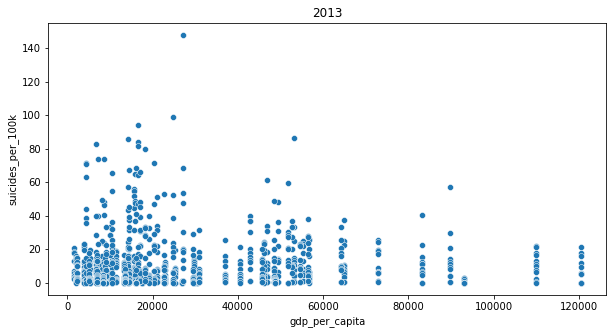

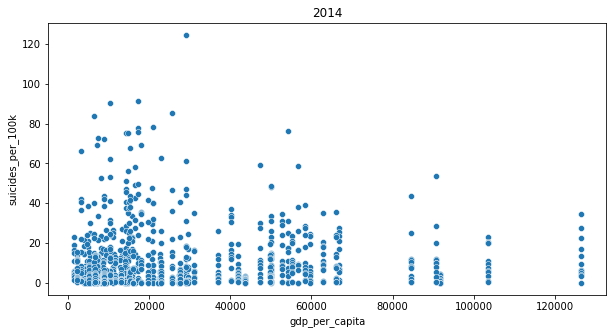

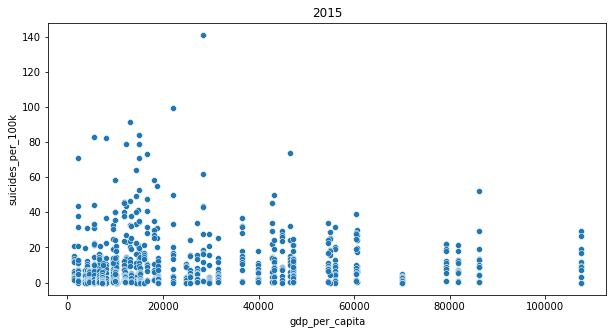

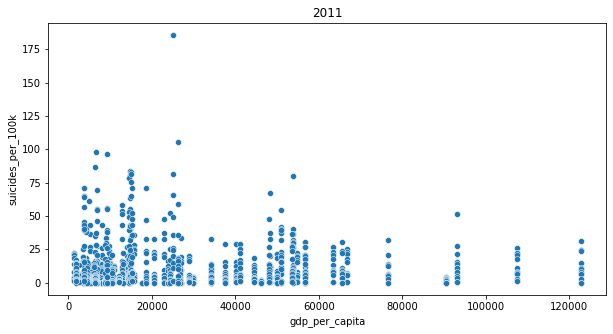

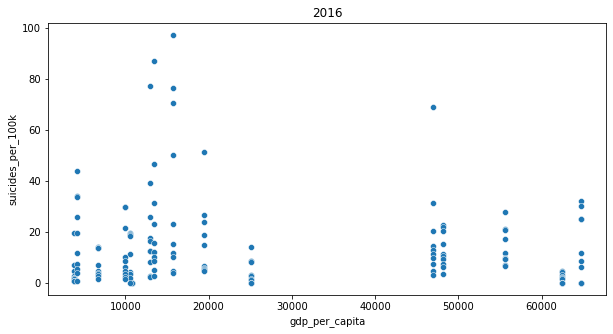

In [21]:
# generally appears to be negative correlation between gdp_per_capita and suicides_per_100k.

for year in suicide_data.year.unique():
    fig, ax = plt.subplots(figsize = (10, 5))
    year_data = suicide_data[suicide_data.year == year]
    sns.scatterplot(ax = ax, x = "gdp_per_capita", y = "suicides_per_100k", data = year_data) \
        .set_title(year)

## Lastly, have a look year indicator

<ipython-input-22-b6b6b85ff428>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (10, 5))


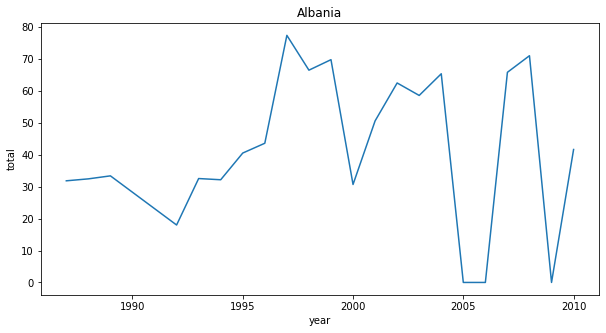

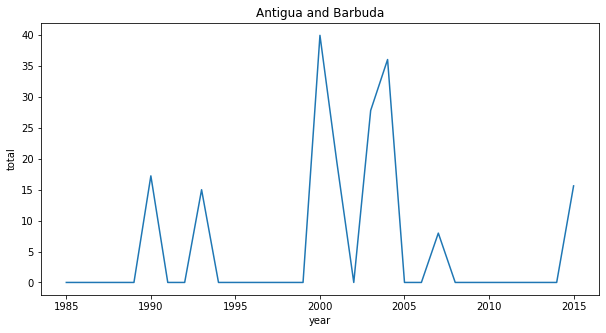

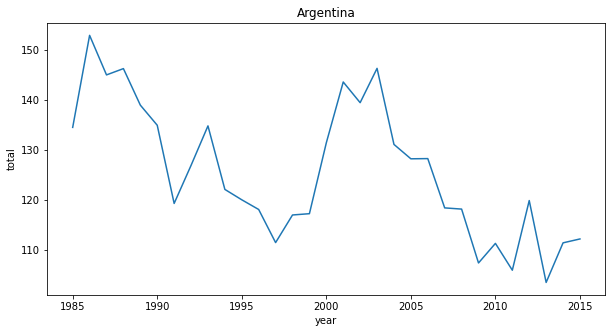

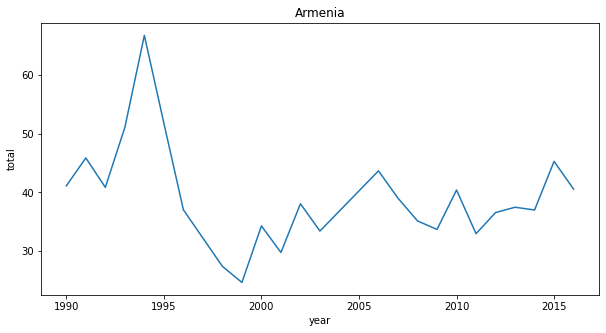

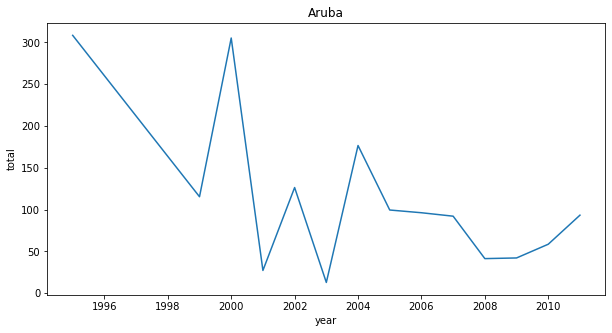

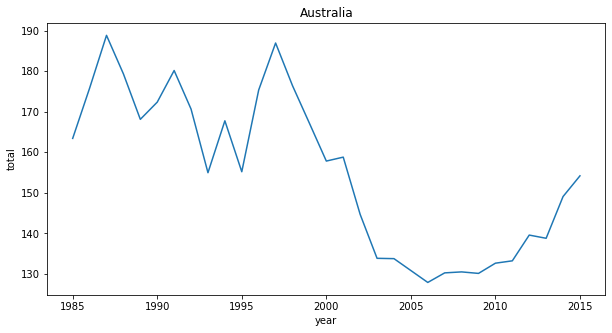

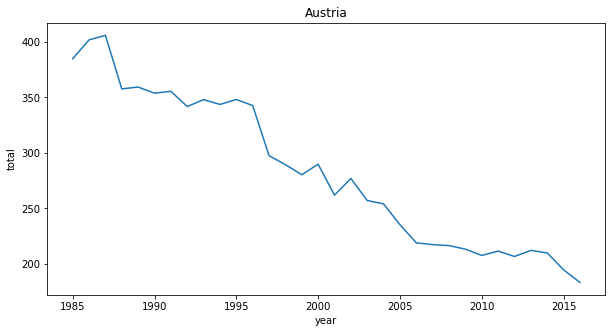

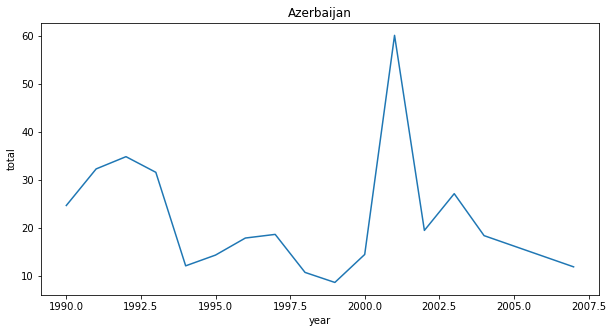

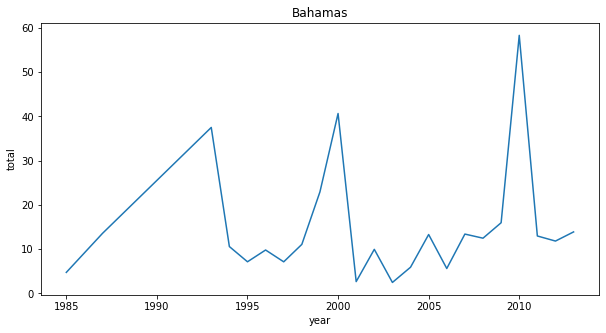

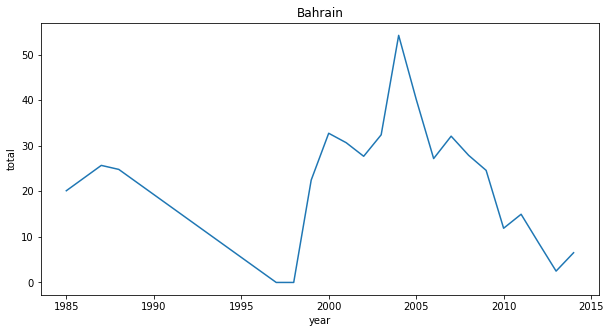

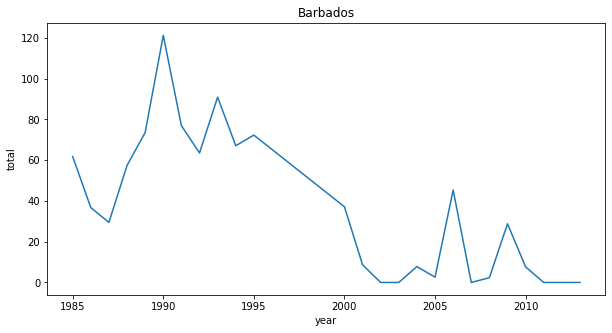

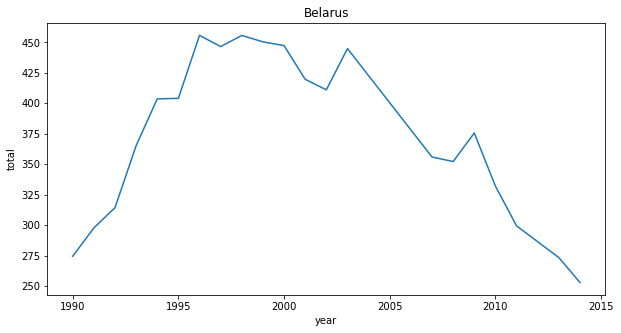

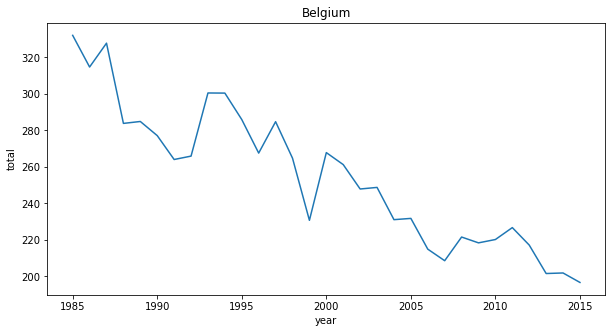

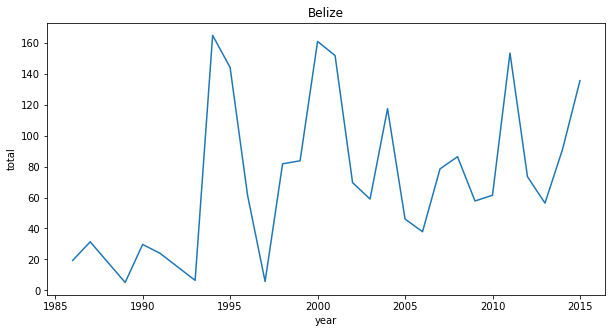

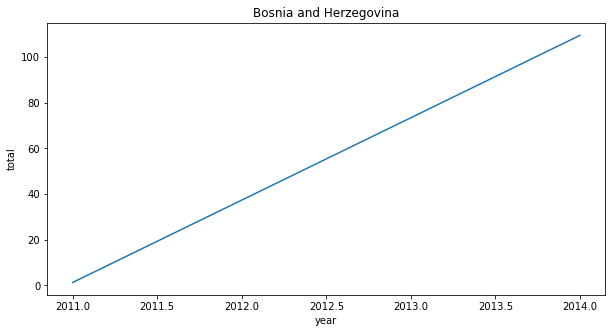

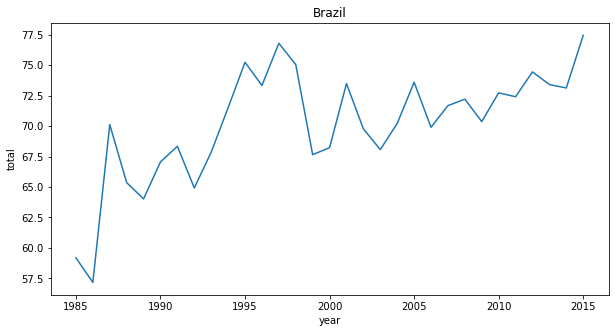

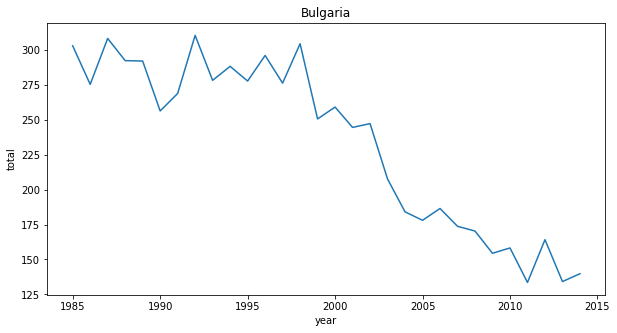

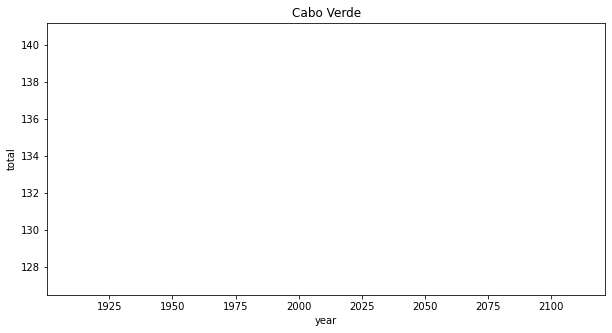

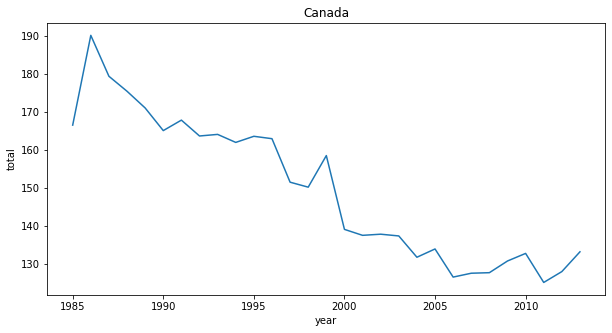

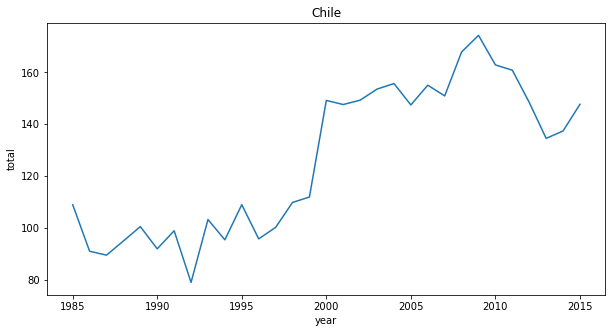

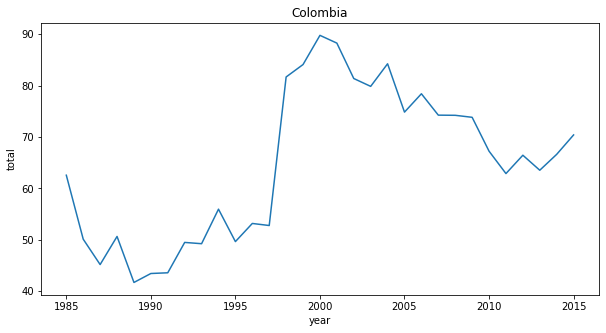

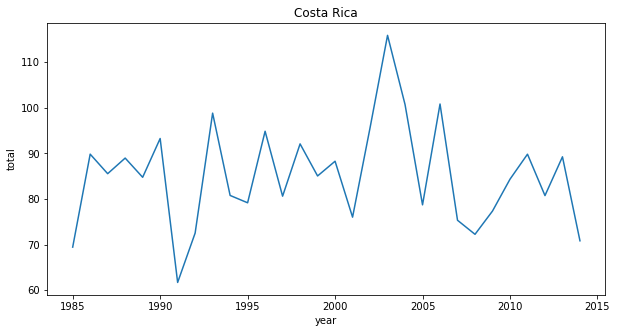

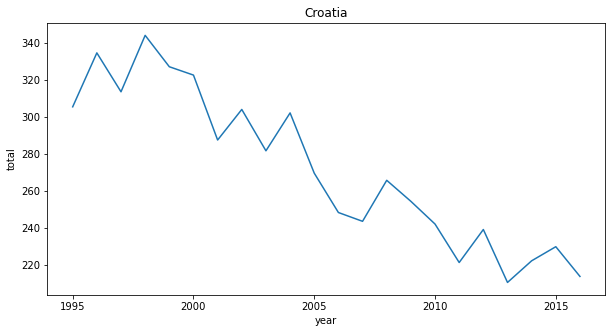

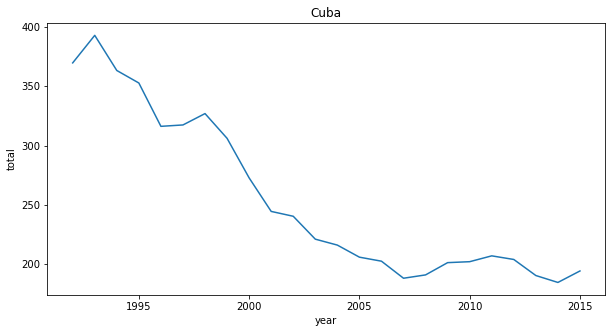

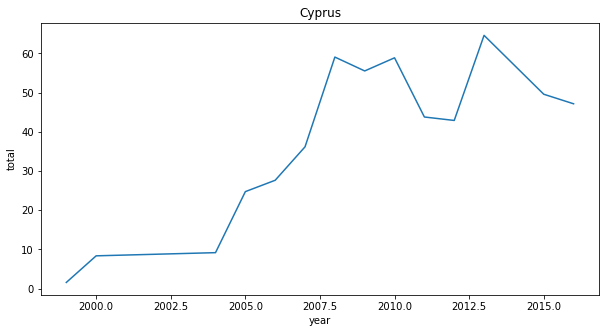

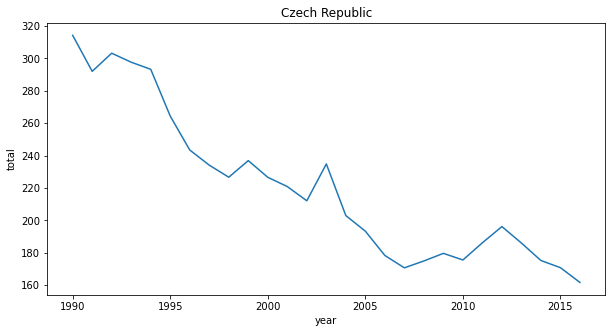

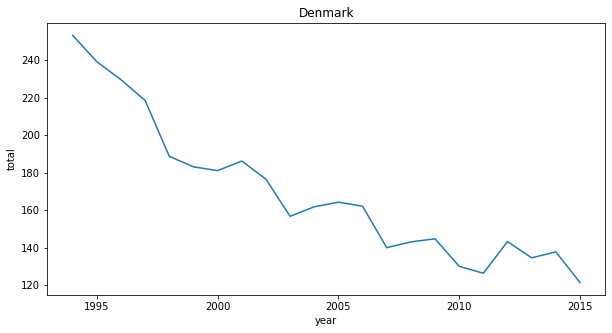

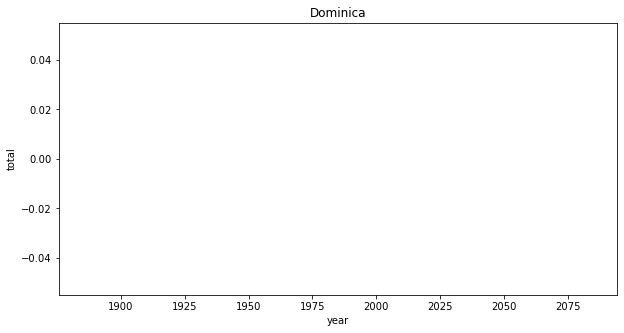

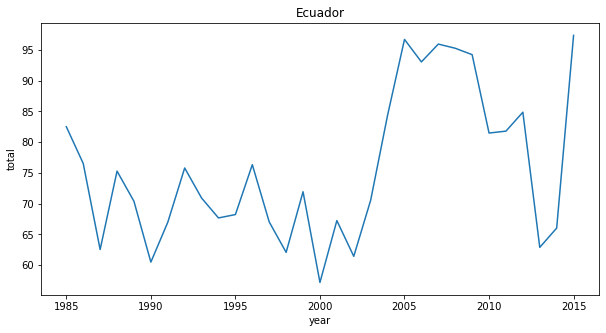

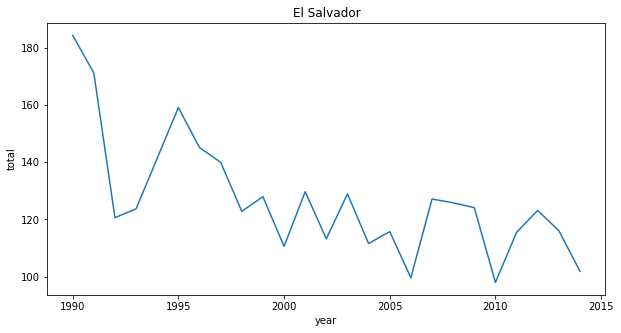

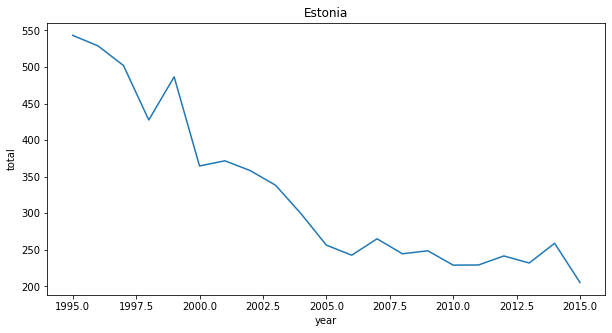

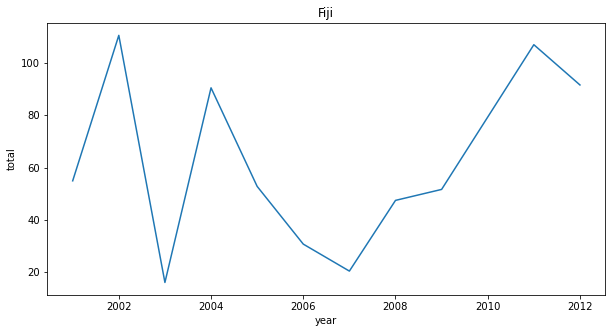

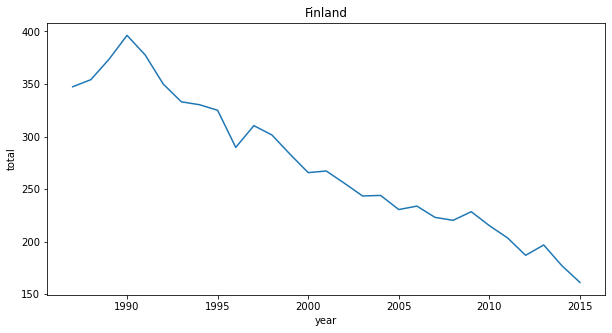

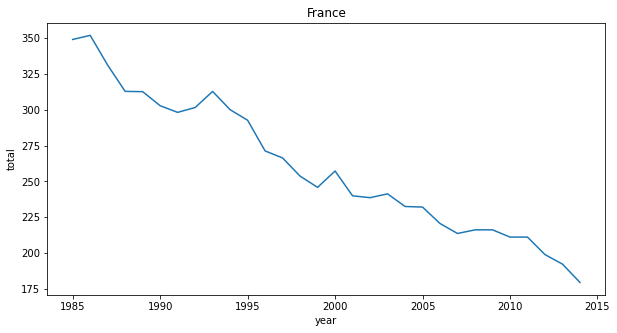

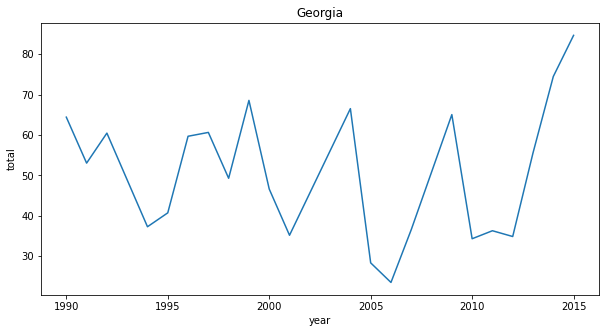

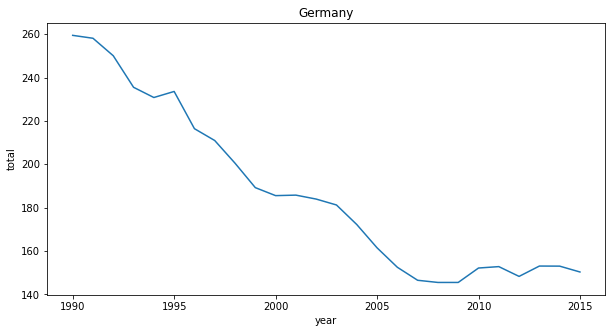

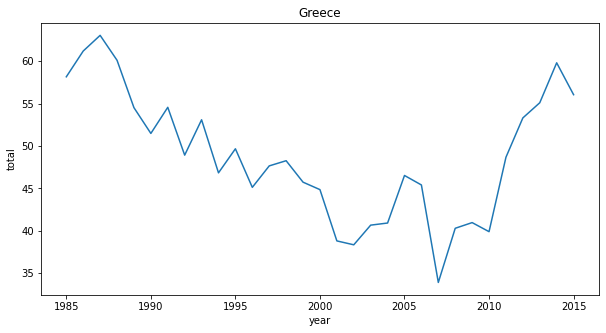

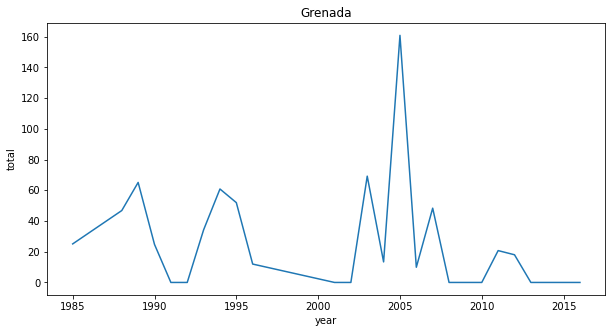

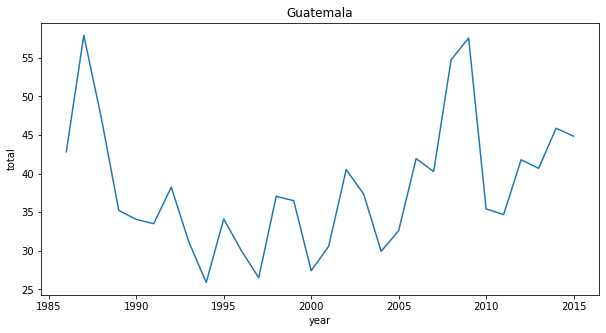

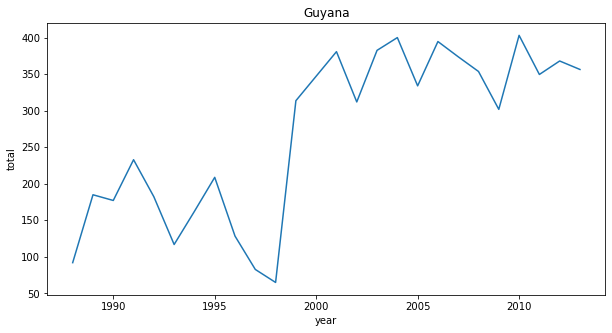

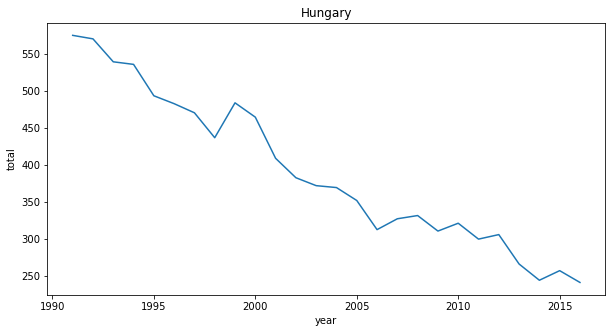

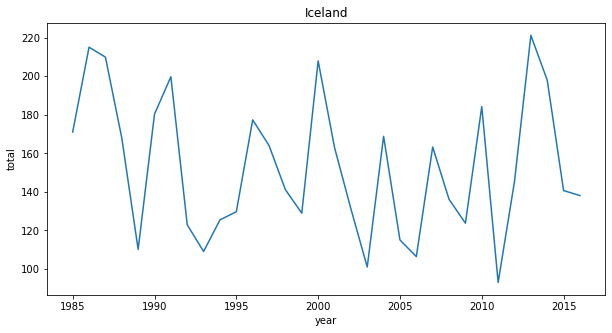

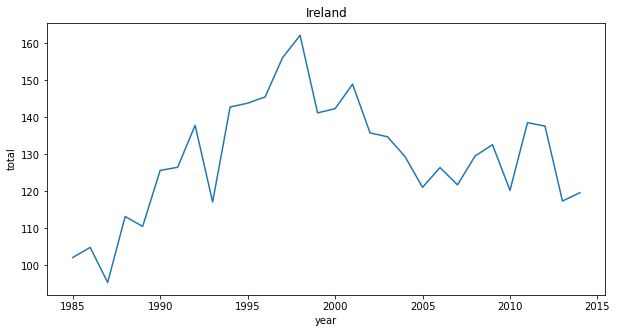

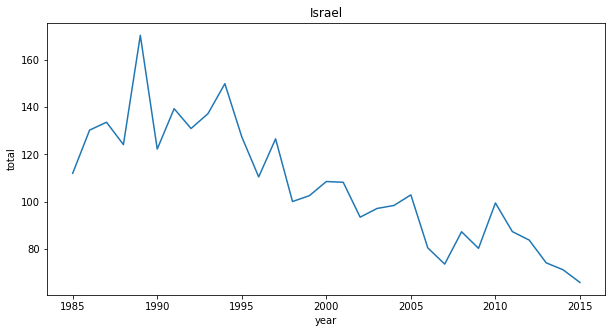

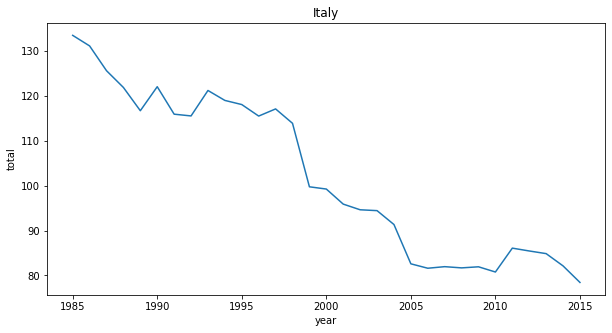

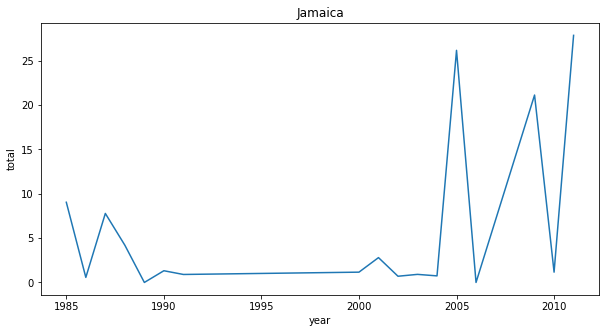

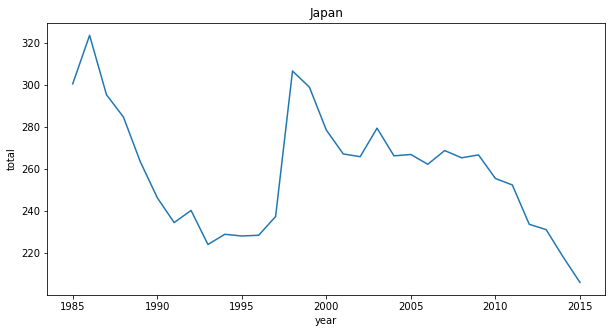

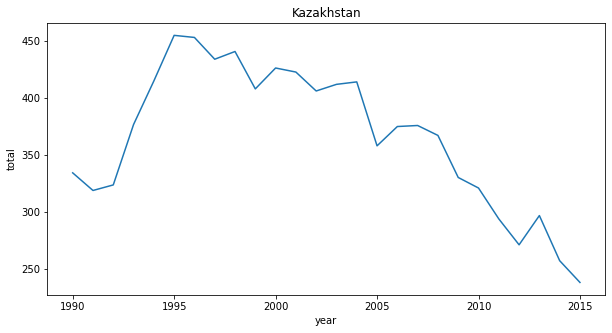

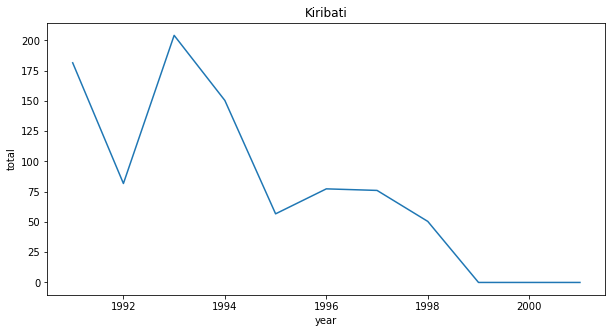

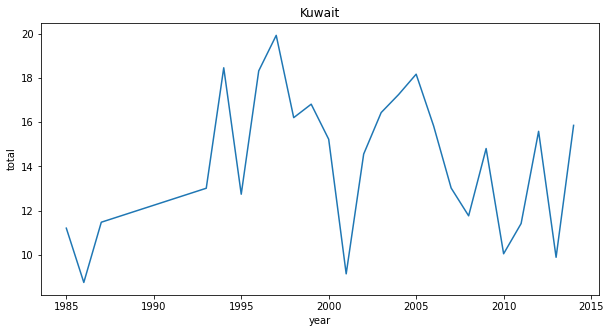

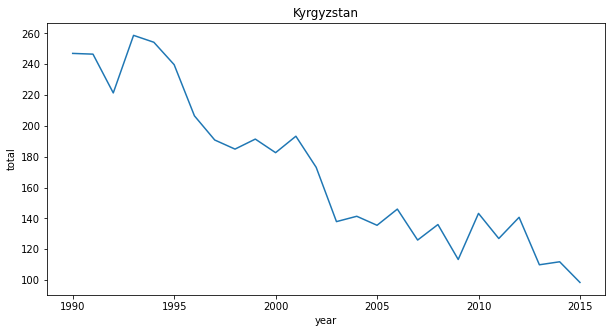

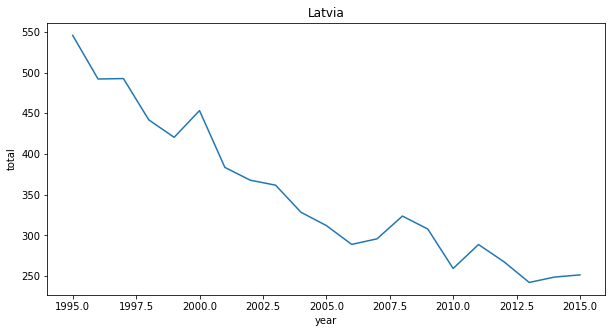

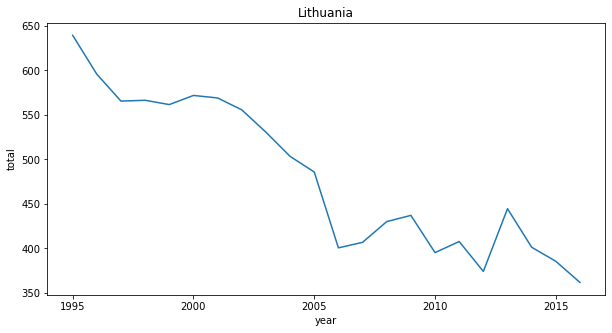

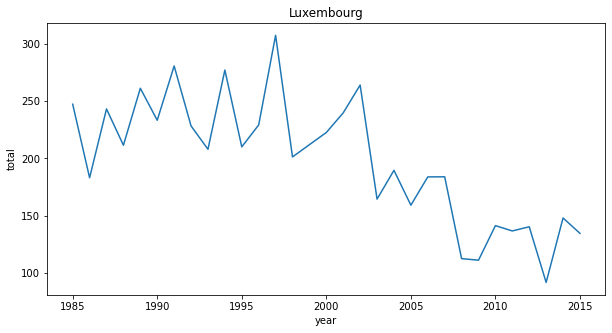

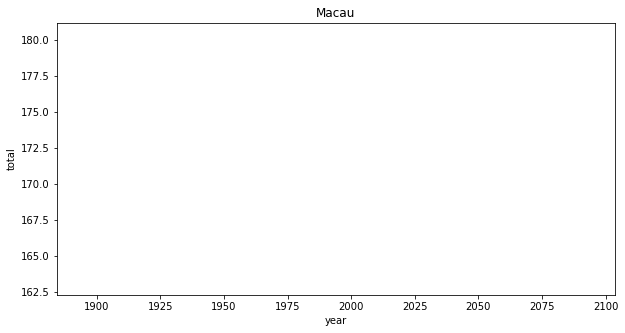

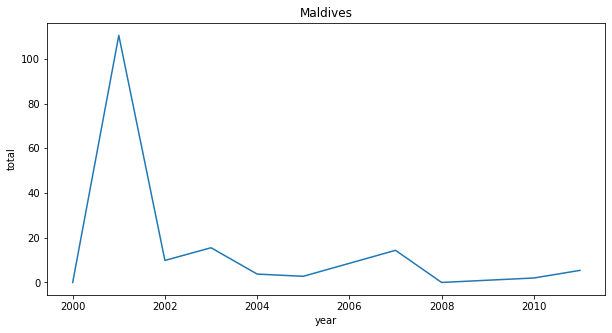

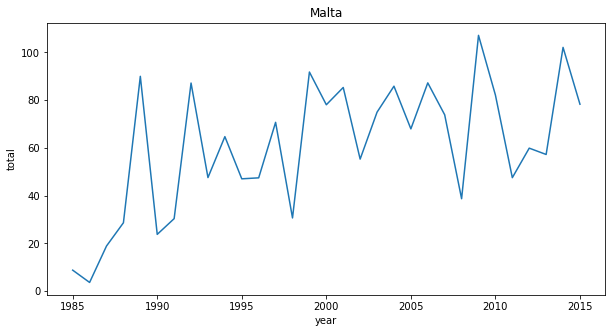

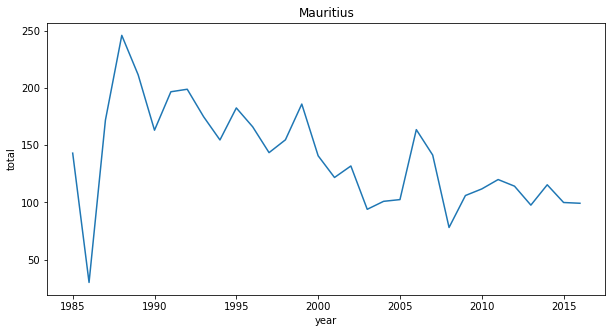

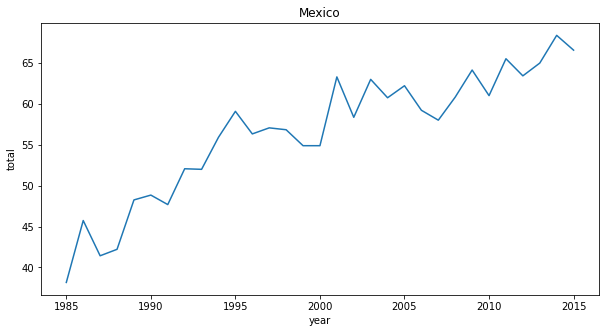

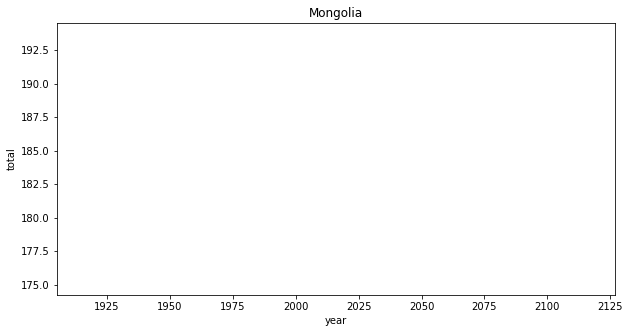

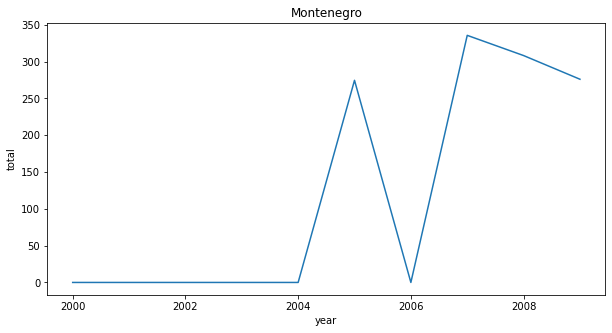

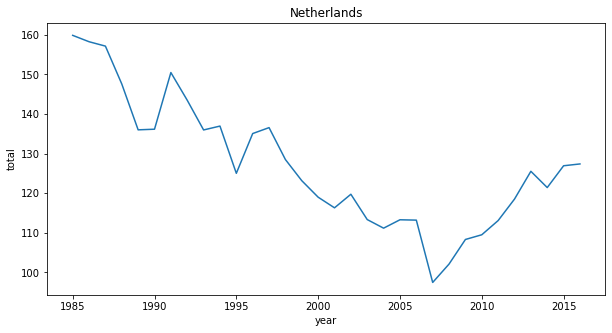

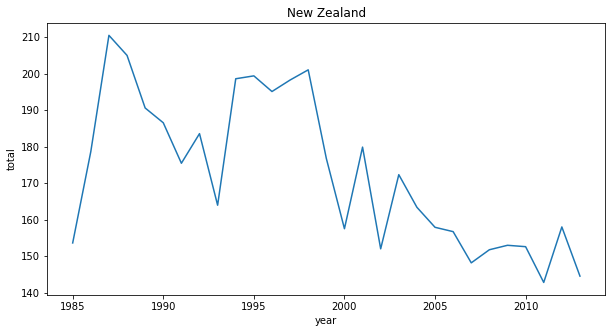

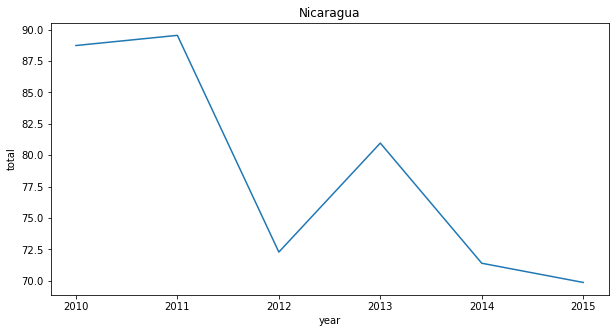

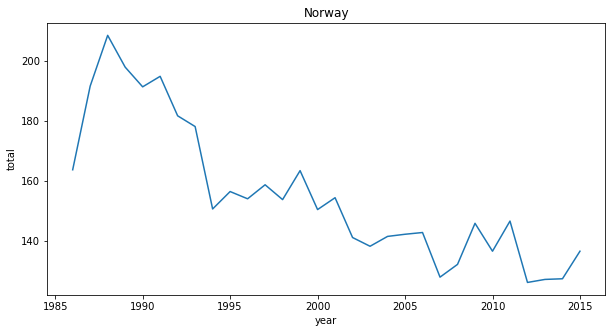

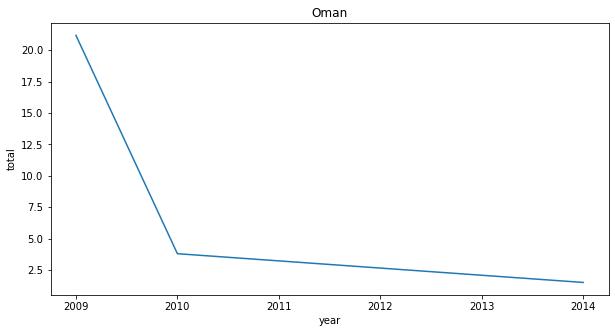

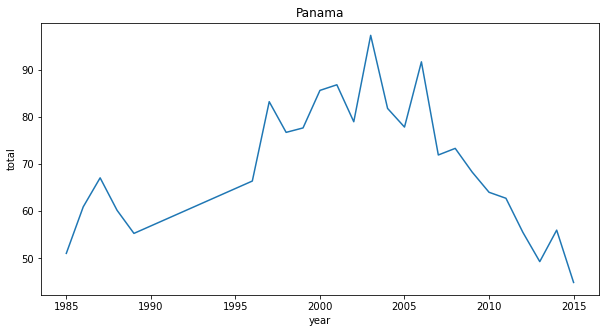

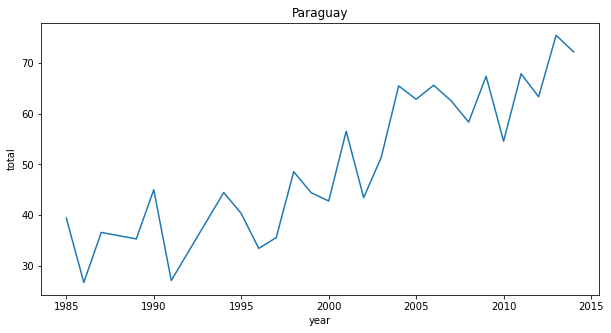

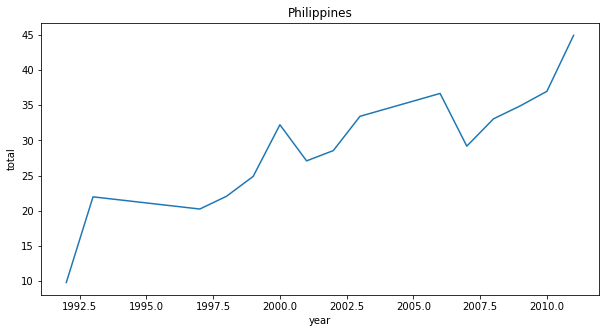

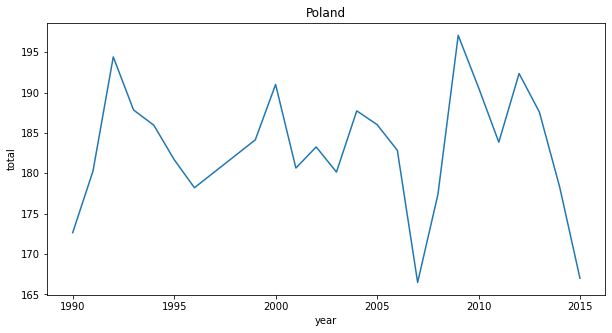

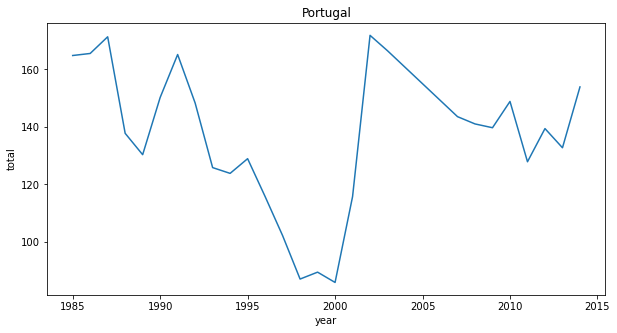

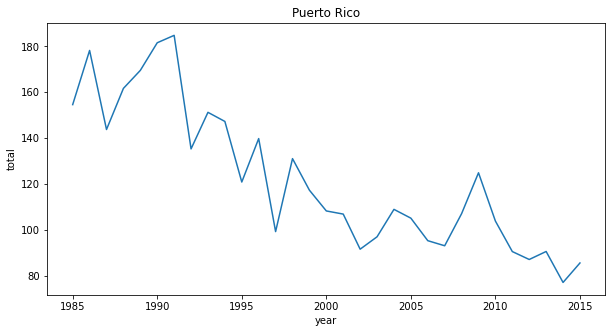

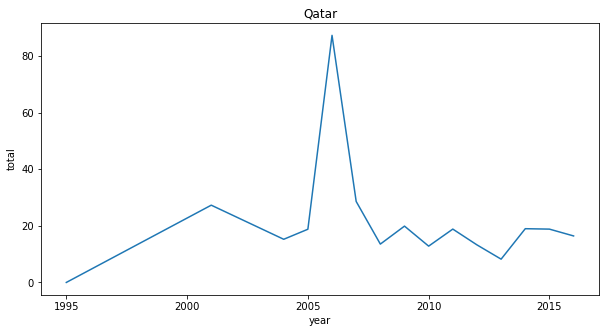

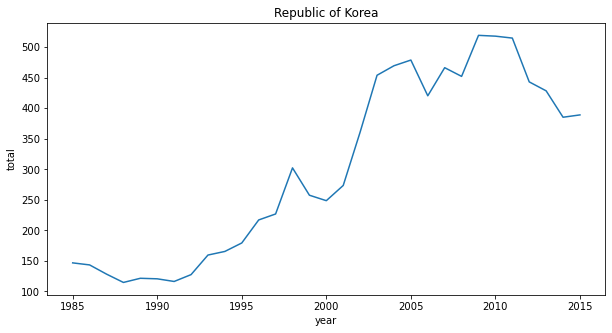

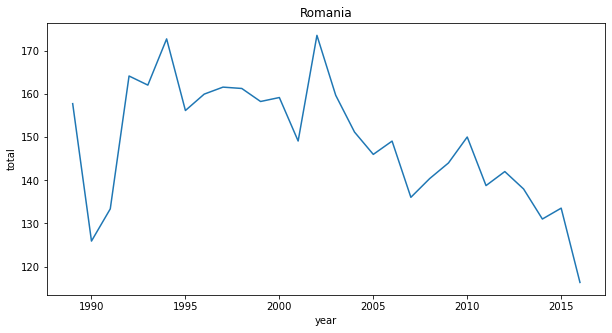

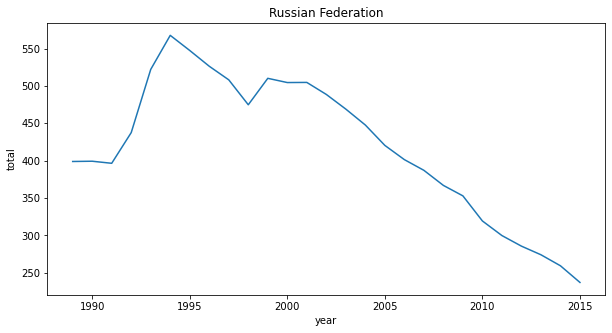

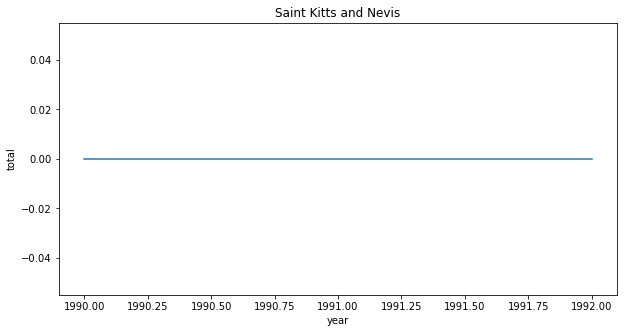

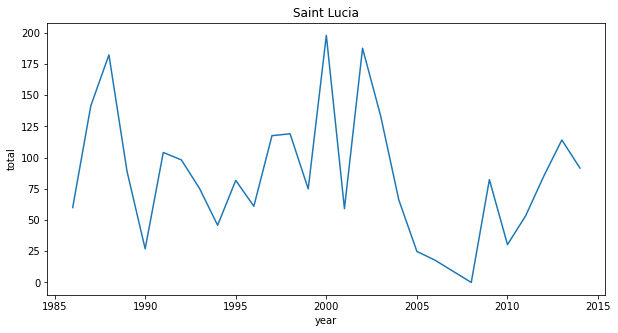

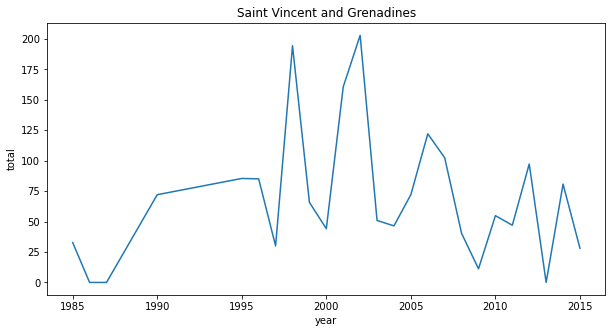

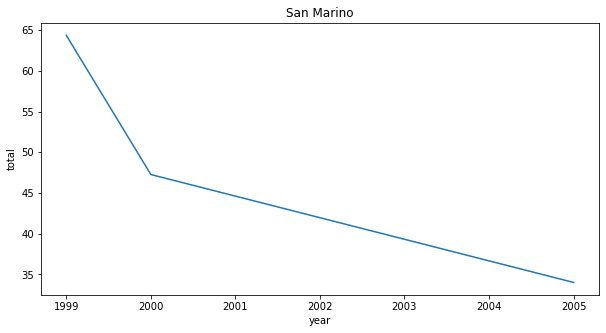

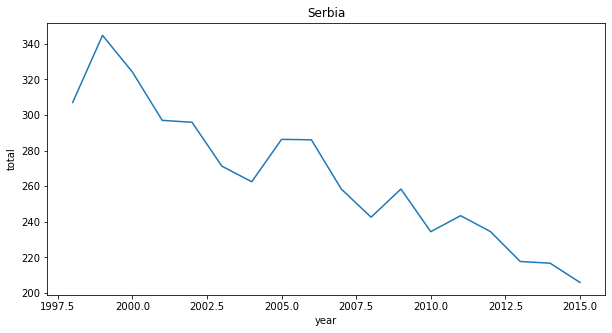

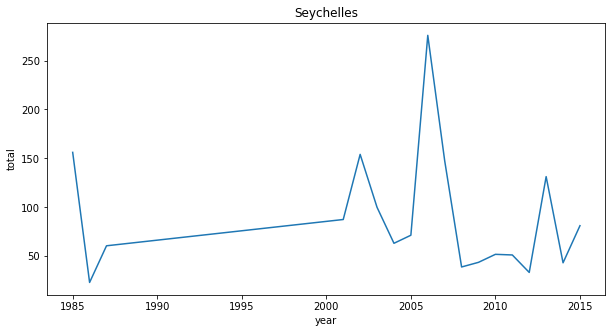

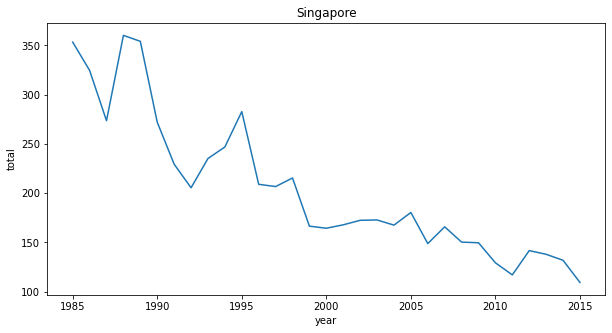

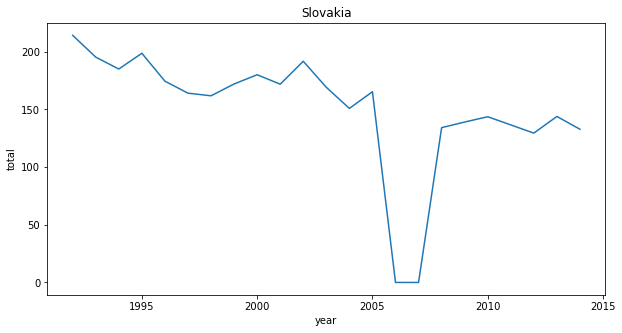

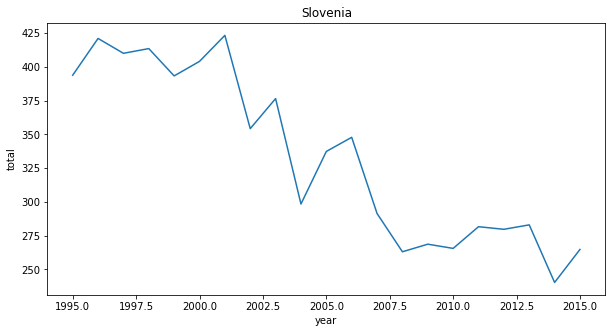

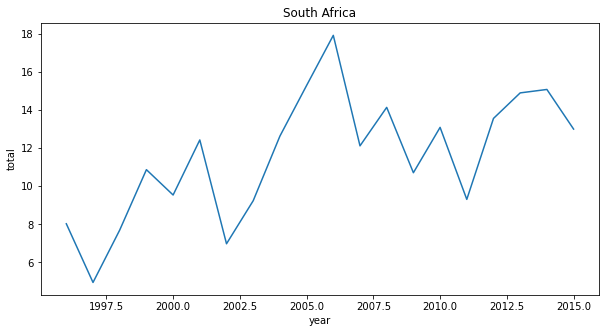

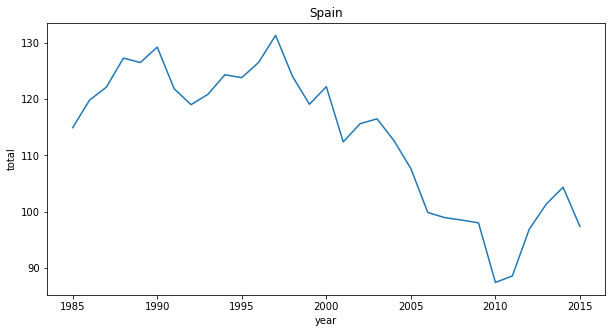

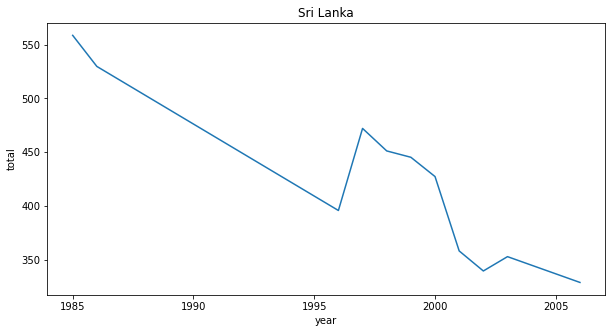

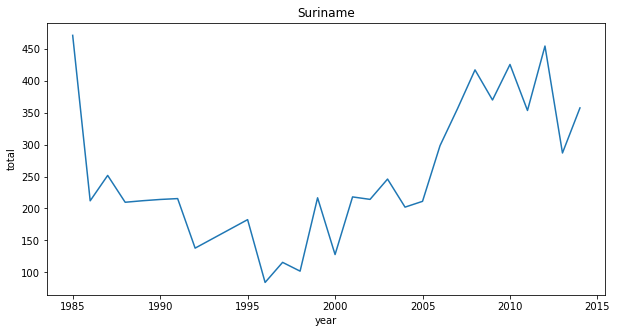

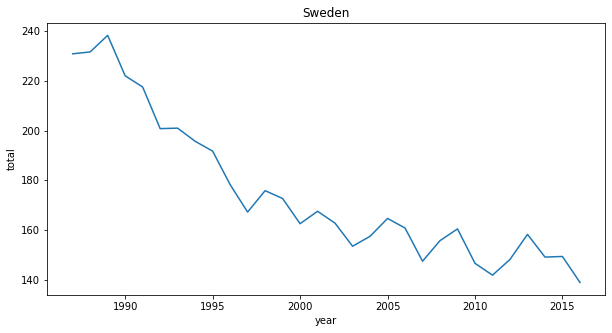

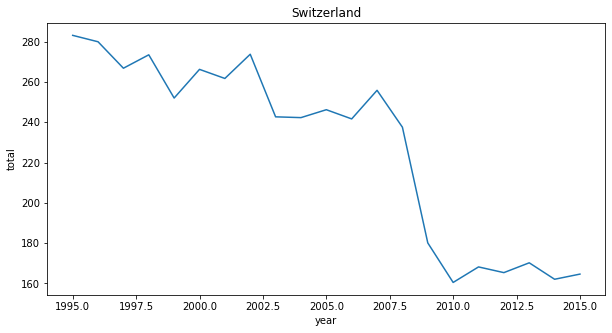

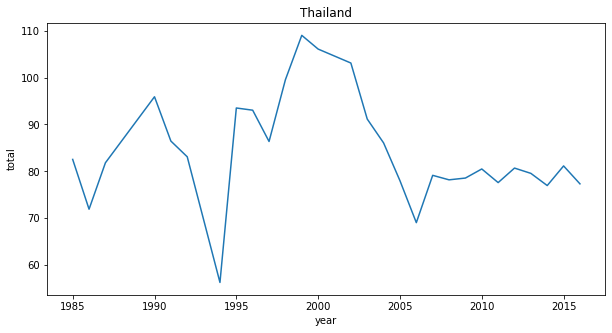

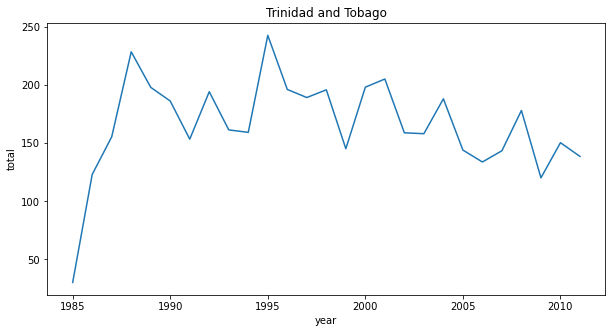

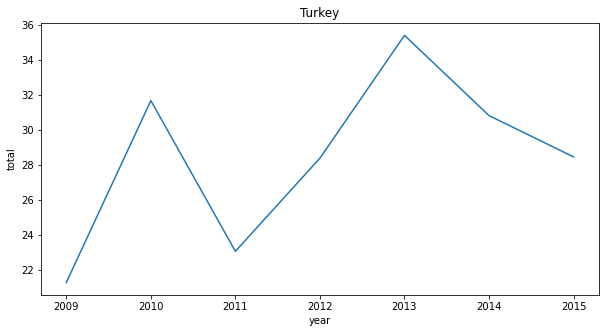

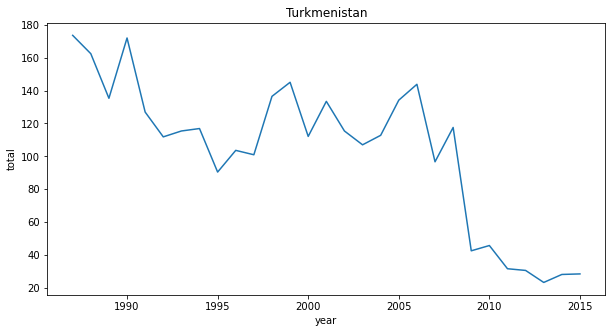

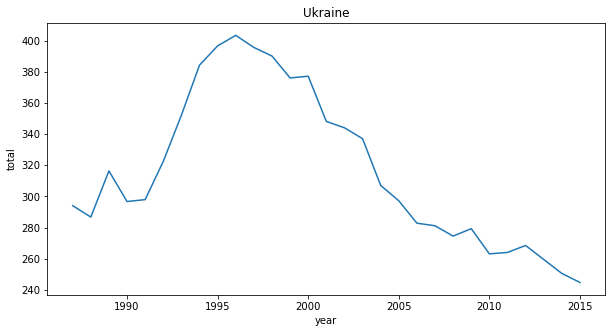

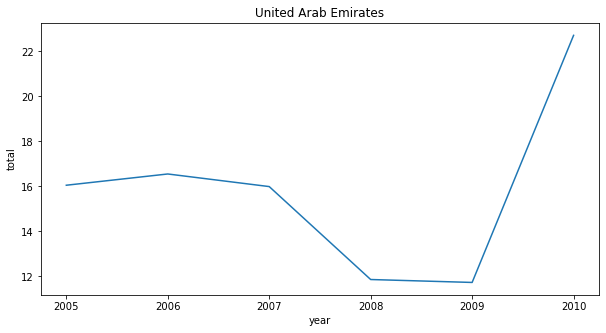

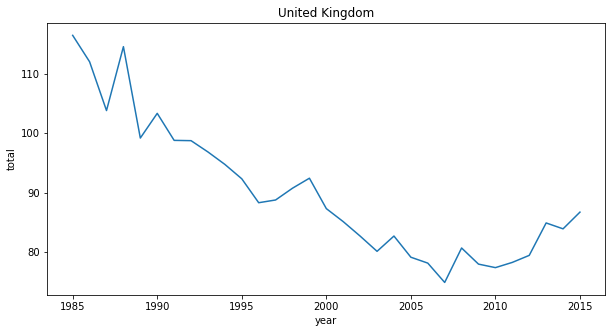

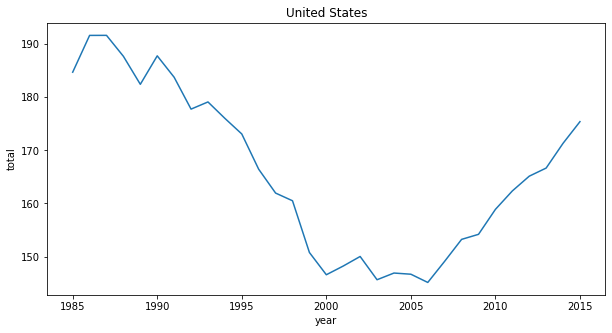

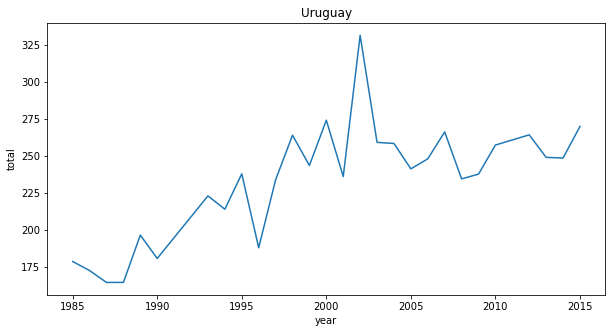

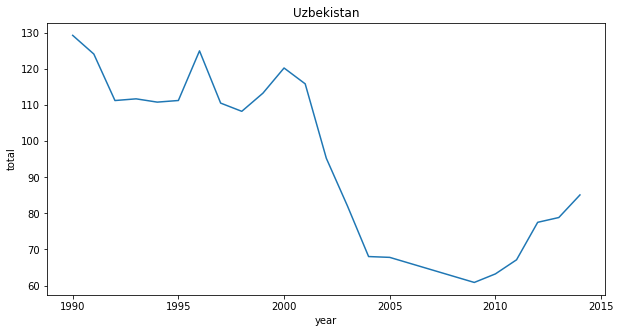

In [22]:
country_year_data = suicide_data.groupby(by = ["country",  "year"]) \
    .apply(func = lambda x: pd.Series({"total": x.suicides_per_100k.sum()})) \
    .reset_index()

for country in country_year_data.country.unique():
    fig, ax = plt.subplots(figsize = (10, 5))
    sns.lineplot(ax = ax, x = "year", y = "total" \
                 ,data = country_year_data[country_year_data.country == country]) \
    .set_title(country)

***majority of countries have a decreasing relationship with suicide rate,*** <br>
***some countries are increasing like south korea***

In [23]:
# any easy correlated variables
# understandably gdp_per_capita has increased over the years
# also age is correlated with the suicide rate as previously seen
suicide_data.corr()

,year,age,population,suicides_per_100k,gdp_per_capita
year,1.000000,0.002933,0.008850,-0.039037,0.339134
age,0.002933,1.000000,-0.060716,0.362587,0.000785
population,0.008850,-0.060716,1.000000,0.008285,0.081510
suicides_per_100k,-0.039037,0.362587,0.008285,1.000000,0.001785
gdp_per_capita,0.339134,0.000785,0.081510,0.001785,1.000000


## Now lets try and predict suicide rate given the predictors

year (ordinal), age (ordinal), population (real), country (nominal)-removed to leave only South Korea, gender (nominal), gdp per capita (real)

In [24]:
# filter to only South Korea
suicide_data = suicide_data[suicide_data.country == "Republic of Korea"]

In [25]:
suicide_data_wo_korea = suicide_data.drop(columns = ["country"], axis = 1)

In [26]:
# columns for one hot encoding (gender: female or male)
y = suicide_data_wo_korea.loc[:, "suicides_per_100k"]
nominal_cols = suicide_data_wo_korea.dtypes[suicide_data_wo_korea.dtypes == object].reset_index().iloc[:, 0]

suicide_data_nominal = suicide_data_wo_korea.loc[:, nominal_cols] #only gender
suicide_data_quant = suicide_data_wo_korea.drop(columns = nominal_cols, axis = 1)

# remove target from suicide_data_quant
suicide_data_quant.drop(columns = ["suicides_per_100k"], axis = 1, inplace = True)

In [27]:
suicide_data_quant

,year,age,population,gdp_per_capita
20230,1985,6,154800,2731
20231,1985,5,1498300,2731
20232,1985,4,4285700,2731
20233,1985,3,3616800,2731
20234,1985,2,4413000,2731
...,...,...,...,...
20597,2015,4,8337331,28410
20598,2015,2,3580725,28410
20599,2015,2,3211732,28410
20600,2015,1,2523952,28410


In [28]:
# one hot transformer
enc = OneHotEncoder(sparse=False)
enc.fit(suicide_data_nominal)
enc_out = enc.transform(suicide_data_nominal)

# column bind onto quant data
X = np.concatenate([suicide_data_quant, enc_out], axis = 1)

In [29]:
enc.categories_

[array(['female', 'male'], dtype=object)]

In [30]:
enc_out #first column is female, second column is male

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [31]:
X

array([[1.985000e+03, 6.000000e+00, 1.548000e+05, 2.731000e+03,
        0.000000e+00, 1.000000e+00],
       [1.985000e+03, 5.000000e+00, 1.498300e+06, 2.731000e+03,
        0.000000e+00, 1.000000e+00],
       [1.985000e+03, 4.000000e+00, 4.285700e+06, 2.731000e+03,
        0.000000e+00, 1.000000e+00],
       ...,
       [2.015000e+03, 2.000000e+00, 3.211732e+06, 2.841000e+04,
        1.000000e+00, 0.000000e+00],
       [2.015000e+03, 1.000000e+00, 2.523952e+06, 2.841000e+04,
        0.000000e+00, 1.000000e+00],
       [2.015000e+03, 1.000000e+00, 2.347429e+06, 2.841000e+04,
        1.000000e+00, 0.000000e+00]])

In [32]:
y

20230    27.13
20231    26.23
20232    21.07
20233    18.11
20234    15.36
         ...  
20597    16.46
20598    11.76
20599     7.97
20600     0.67
20601     0.60
Name: suicides_per_100k, Length: 372, dtype: float64

In [33]:
lm = LinearRegression()
lm.fit(X, y.values)

LinearRegression()

In [34]:
suicide_data_wo_korea

,year,sex,age,population,suicides_per_100k,gdp_per_capita
20230,1985,male,6,154800,27.13,2731
20231,1985,male,5,1498300,26.23,2731
20232,1985,male,4,4285700,21.07,2731
20233,1985,male,3,3616800,18.11,2731
20234,1985,male,2,4413000,15.36,2731
...,...,...,...,...,...,...
20597,2015,female,4,8337331,16.46,28410
20598,2015,male,2,3580725,11.76,28410
20599,2015,female,2,3211732,7.97,28410
20600,2015,male,1,2523952,0.67,28410


In [35]:
lm.coef_ #y = a1x1 +a2x2 +a3..
#a1(year) is positive relation in y, a2(age), a3(population) and a4(gdp) is negative
#but very weak ... the last two are for gender (female shows lower suicidal rate than male)

array([ 2.04568924e+00,  1.05073401e+01, -3.39555083e-06, -8.42597102e-04,
       -1.03326438e+01,  1.03326438e+01])

In [36]:
mean_absolute_error(lm.predict(X), y.values)
#the result means that for true 7 on avg prediction 21
#therefore, this is not good model and the reason why the master data requires to combine with other datasets
#which supply more features for training model.

14.238399940599754

In [37]:
np.median(y.values)

14.405000000000001